<a href="https://colab.research.google.com/github/fppfurtado/mvp-pos-ciencia-de-dados/blob/main/Projeto_MVP_Sprint_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contextualização e Descrição do Problema

A empresa XPTO, distribuidora de pequeno porte, trabalha comprando e revendendo mercadorias de terceiros, e fazendo a entrega dos pedidos no endereço do cliente. Atualmente está com problemas financeiros, precisando cortar gastos
 e aumentar seu faturamento para equilibrar seu fluxo de caixa. A Administração da Empresa deseja revisar  seu catálogo de produtos e eliminar do catálogo produtos que sejam comercialmente irrelevantes para poupar capital de giro, esforço de estoque e focar nos produtos de maior impacto no seu faturamento.

No Sistema de Gestão da Empresa, cada venda é efetuada por meio do registro de um Pedido de Venda. Cada Pedido de Venda é vinculado a somente um cliente e pode conter um ou mais itens do catálogo de produtos que tenham estoque positivo.

Dentre os relatórios disponibilizados pelo Sistema, destacam-se as seguintes opções para subsidiar a análise proposta:

- (I) Vendas Por Período
- (II) Itens por Pedido de Venda
- (III) Curva ABC de Itens Vendidos

O relatório (I) apresenta informações gerais sobre as vendas registradas, sem incluir os itens vendidos; o relatório (II) relaciona os itens vendidos com o código identificador do respectivo Pedido de Venda; e o relatório (III) é um relatório gerencial da análise ABC dos produtos vendidos.

A Análise ABC é um método para classificar os itens vendidos de acordo com sua participação no faturamento bruto da empresa em determinado período, nos seguintes grupos:
+ **Grupo A**: 20% do catálogo de produtos com maior participação no faturamento total do período;
+ **Grupo B**: 30% do catálogo de produtos, seguinte ao Grupo A, com maiores participações no faturamento total do período;
+ **Grupo C**: 50% restante do catálogo de produtos, que correspondem ao restante do faturamento no período apurado.

Por meio dessa classificação é possível traçar um gráfico conhecido como Curva ABC que relaciona a porcentagem de participação no catálogo de produtos com a porcentagem de participação do faturamento do período apurado.

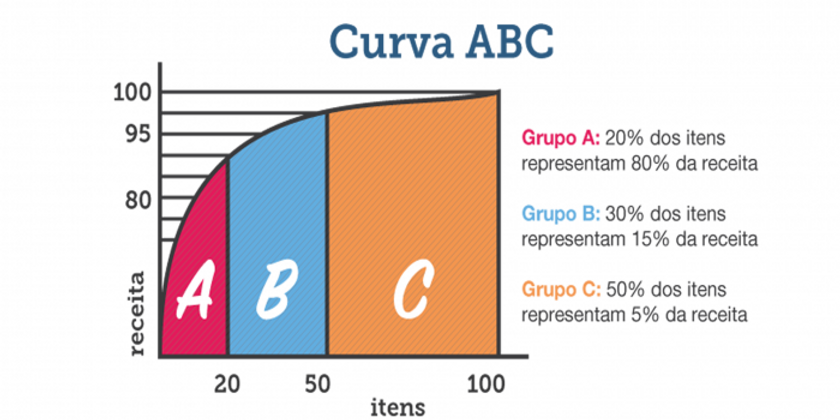

Dessa forma, uma possível solução para o problema da empresa XPTO é analisar a viabilidade de eliminação total ou parcial dos produtos do grupo C, mantendo assim no catálogo de produtos apenas itens de maior impacto econômico para a empresa.

**OBSERVAÇÃO**: os dados utilizados no presente trabalho são dados comerciais de uma empresa real, cuja identidade não será revelada, mas que tiveram sua utlização devidamente autorizada.

## Objetivos

Eliminar do catalógo de produtos todos os itens que, no período de um ano, não impactem em mais de 5% do faturamento bruto da Empresa.

Para isso precisamos analisar o impacto das vendas que possuem somente itens do grupo C e vendas que possuem itens do grupo C junto com itens de outros grupos, para avaliar a viabilidade de eliminar total ou parcialmente os itens do grupo C.

### Perguntas a Responder

**VENDAS SOMENTE COM ITENS DO GRUPO C**
- (I) Quais itens do grupo C não foram vendidos juntos com outros itens do grupo A ou B?
- (II) Qual a quantidade dos itens em (I)?
- (III) Qual o total faturado dos itens em (I) e respectiva porcentagem em relação ao faturamento total da empresa?

**VENDAS COM ITENS DO GRUPO C JUNTO COM ITENS DE OUTROS GRUPOS**
- (I) Quantos itens do grupo C foram vendidos juntos com outros itens do grupo A ou B?
- (II) Qual a quantidade dos itens em (I)?
- (III) Qual o total faturado dos itens em (I) e respectiva porcentagem em relação ao faturamento total da empresa?

## Busca Pelos Dados

Os dados utilizados no trabalho serão dados provenientes do sistema ERP de uma empresa real cuja identidade não será revelada, com uso devidamente autorizado. O forma de acesso aos dados será por meio dos três relatórios mencionados na seção de Contextualização, gerados pelo Sistema em formato Excel, com as seguintes informações:
- Vendas Por Período
- Itens por Pedido de Venda
- Curva ABC de Itens Vendidos

O período de apuração para geração dos relatórios será de 25/08/2022 a 25/08/2023.

## Coleta

Para desenvolver o presente projeto optamos por utilizar os recursos e ferramentas da Google Cloud, que disponibiliza créditos gratuitos e período de teste para usuários que criarem conta na plataforma.

O Google Cloud Storage (GSC) é o serviço de armazenamento em nuvem do Google Cloud, onde arquivos de diversos tamanhos e formatos podem ser armazenados. Buckets (baldes) são as abstrações do GSC que funcionam como espaços de armazenamento, onde os arquivos ficarão organizados.

Os relatórios utilizados no projeto foram baixados em formato de planilhas Excel, para então serem carregados para o GCS e submetidos ao pipeline e análise de dados.

## Modelagem

O Google Cloud oferece uma ferramenta faz o gerenciamento e governança de dados, incluindo criação e gerenciamento de Data Lakes, chamada Dataplex. Para cada Lake criada é necessário criar uma ou mais Zonas onde os dados serão alocados.

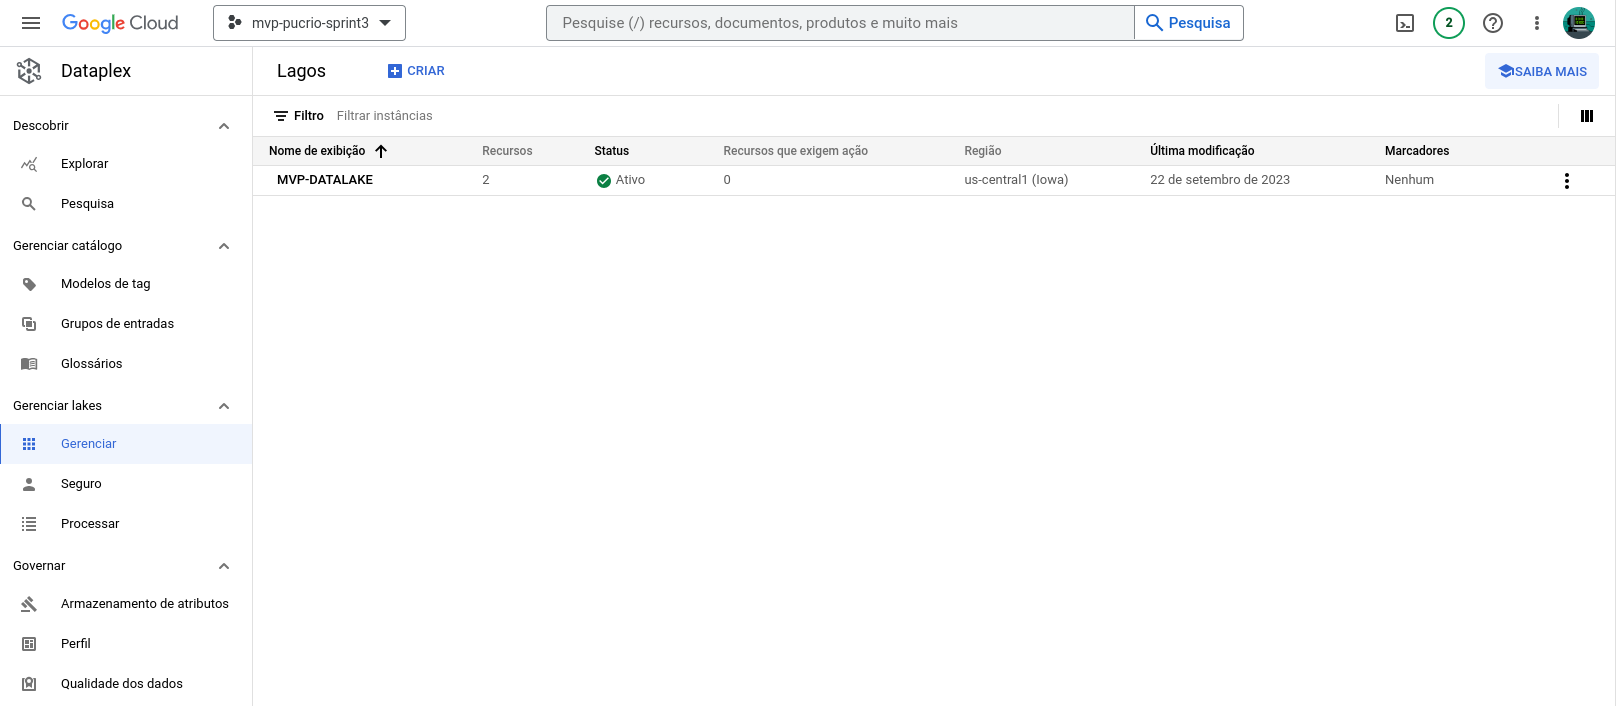

Para organizar a estrutura do Data Lake, optamos por criar duas zonas básicas:
+ **Raw Data Zone**: espaço onde ficam armazenados em seu formato bruto, disponíveis para criação de data pipelines, ETL etc;
+ **Trusted Data Zone**: espaço onde ficam armazenados os dados que passaram por processo de ETL e foram tratados, possuindo garantias de Data Quality, sendo considerados exatos e confiáveis.

Criamos ambas as zonas em nosso Data Lake criado no Dataplex, e as vinculamos aos seus respectivos buckets, cada um para armazenar o tipo próprio de dados de cada Zona.

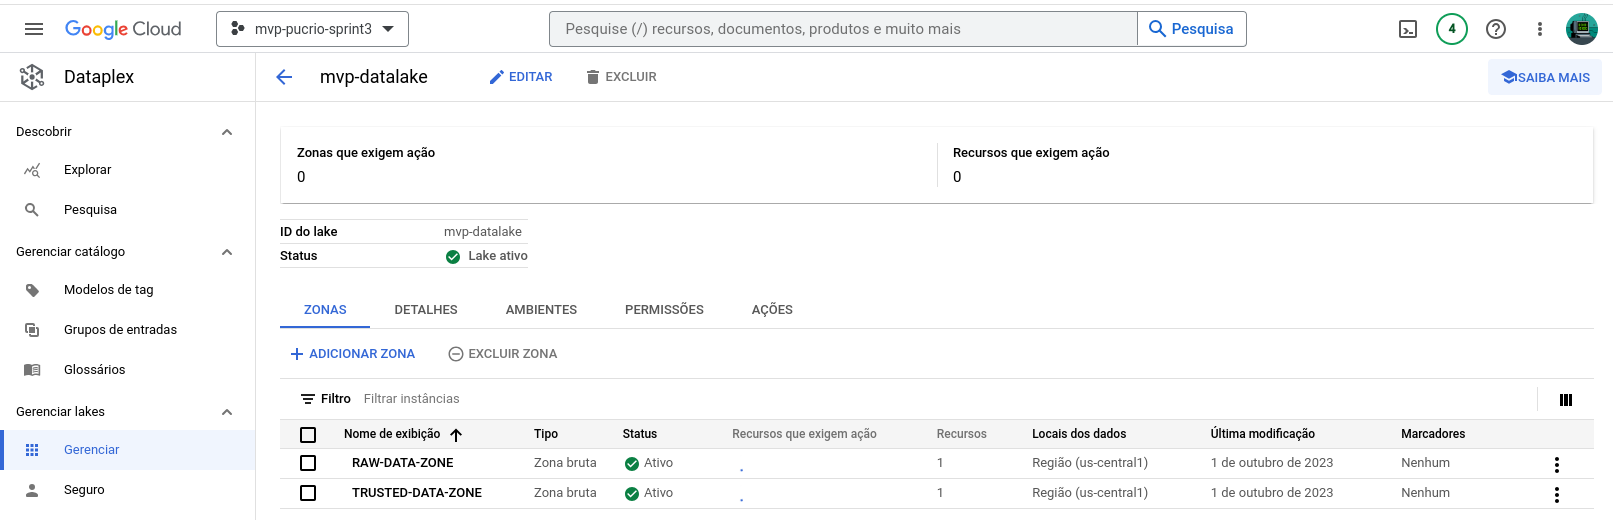

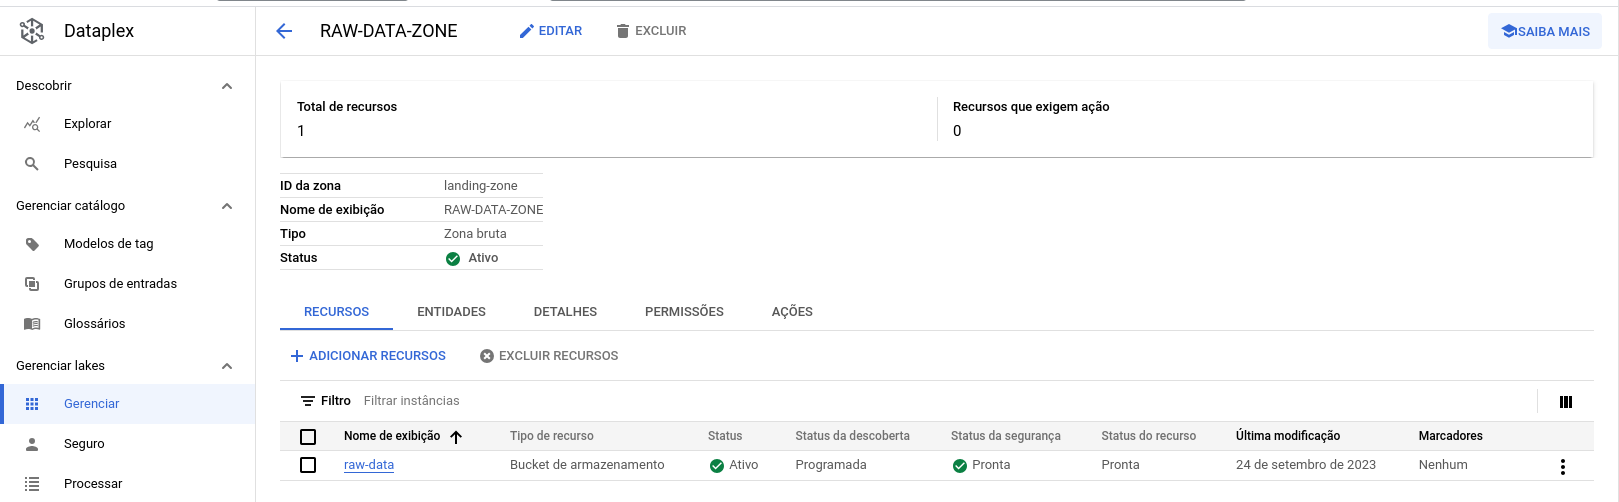

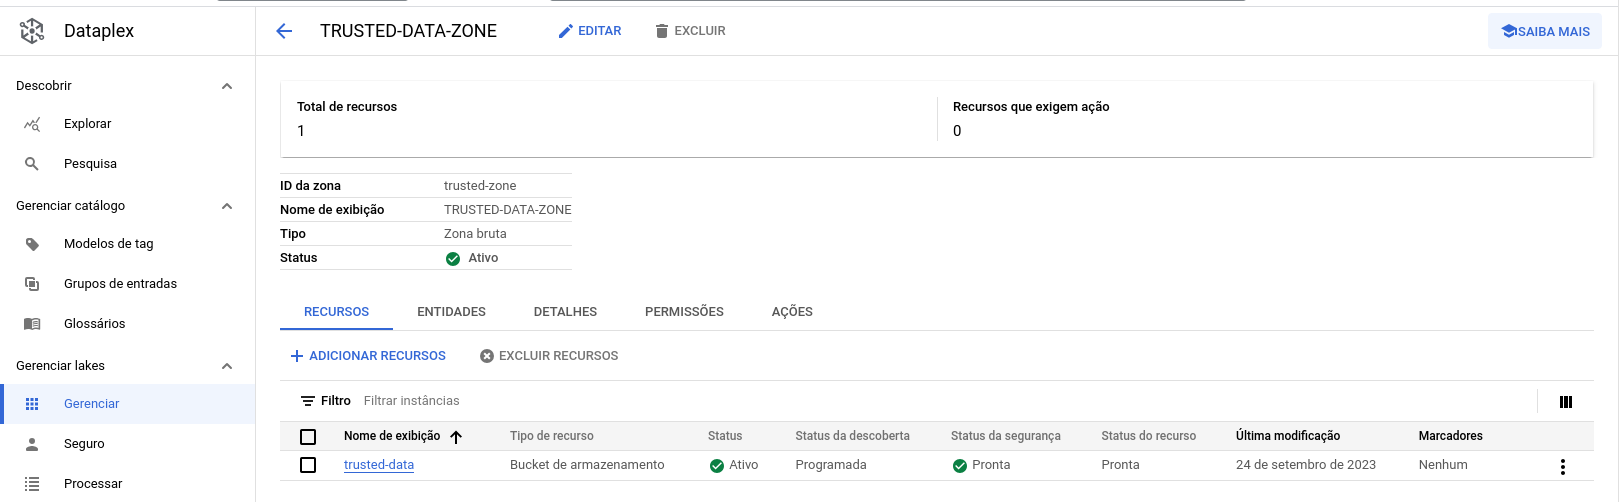

A estratégia é carregar os arquivos Excel como tabelas flat para o Data Lake no Google CLoud, seguindo a sequência de zonas, conforme o nível de organização da estrutura dos dados, para aplicar operações ETL com ferramenta nativa da Nuvem, para então realizar consultas e análises dos dados tradados para resolução do problema proposto.

## Carga

Inicialmente havia sido planejado o uso de apenas dois buckets, Raw Data e Trusted Data, e da ferramenta de ETL Dataprep. Esta última uma ferramenta bastante simples e versátil para realizar diversas transformações em dados, porém mostrou-se incompleta por não abranger a parte de linhagem de dados, diferentemente do Data Fusion.

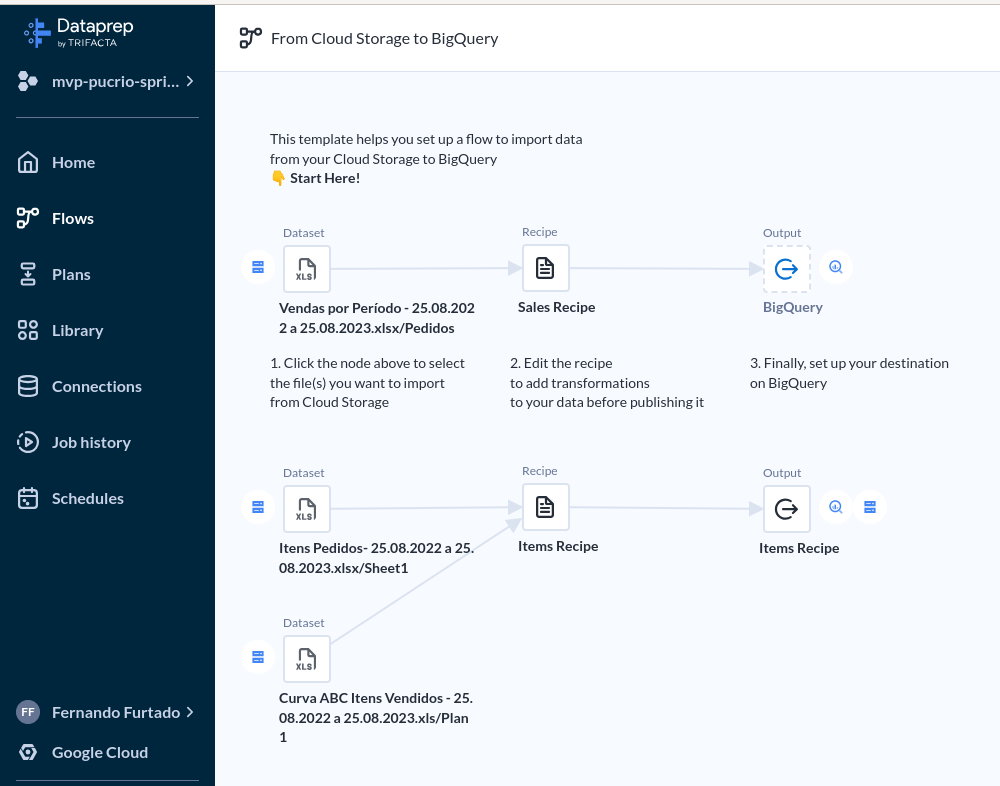

No entanto, ao iniciar os trabalhos de construção do pipeline com o Data Fusion, notou-se outra dificuldade: a de manipular arquivos Excel com o Data Fusion, sobretudo quando os cabeçalhos das colunas apresentavam espaços em branco e barras em seus nomes (característica essa que gerava erro incontornável no uso da ferramenta).


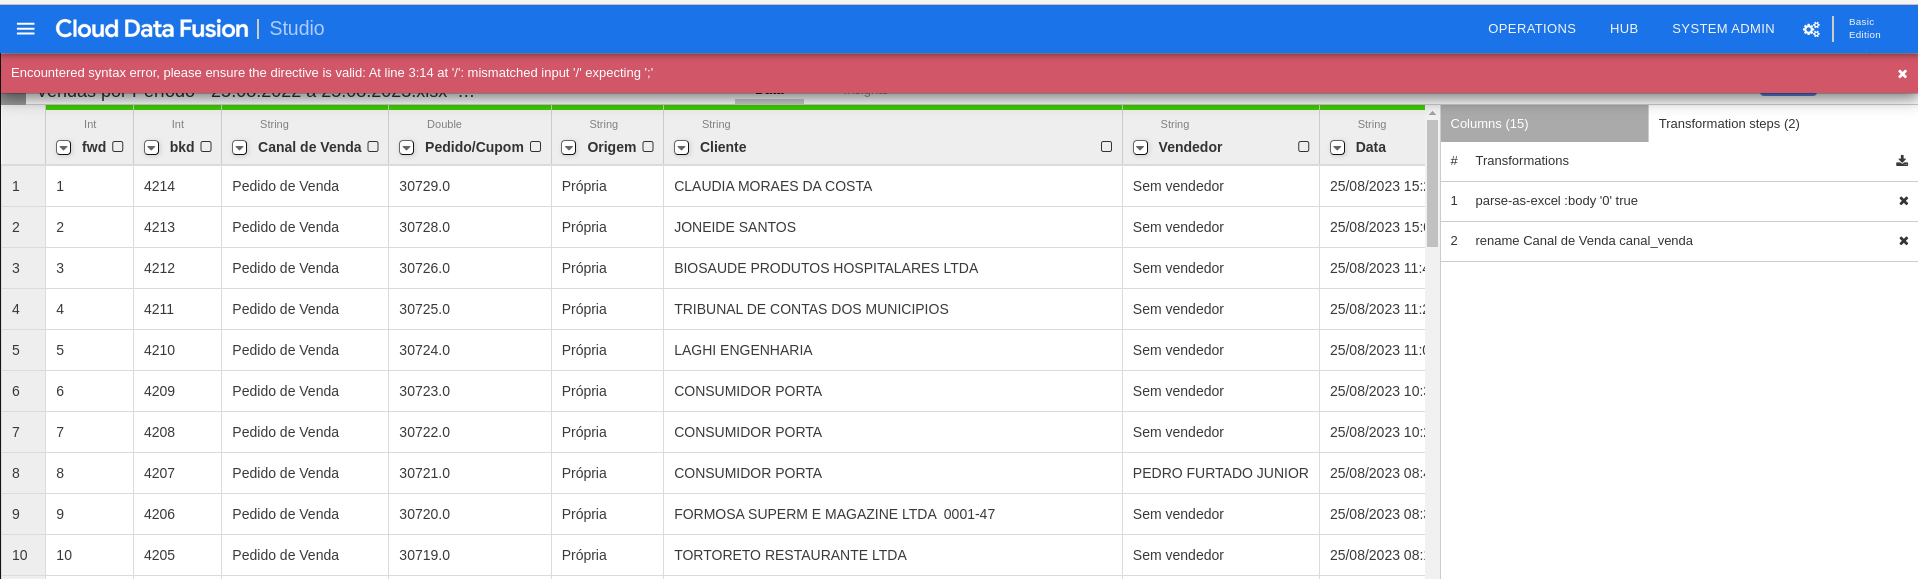

Para remediar tal dificuldade, optamos por implementar a ideia de uma zona de transição para receber os arquivos Excel, e então transformá-los em CSV (com as devidas correções de nomenclatura de cabeçalho) utilizando a ferramenta Dataprep, para finalmente armazená-los no bucket de Trusted Data.

A partir de então, poderíamos de fato iniciar a contrução do pipeline de ETL com a ferramenta Data Fusion.

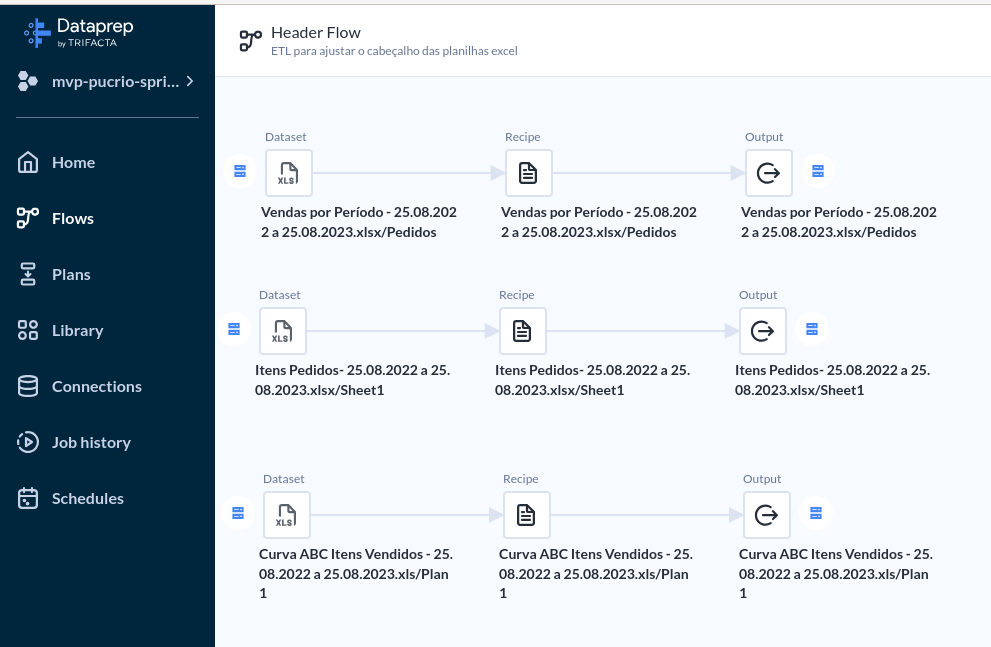

Os Recipes representam as sequencias de transformações aplicadas aos dados no pipeline, equivalente ao Wrangle do Data Fusion. Dentro dele, deletamos algumas colunas irrelevantes e renomeamos as que permaneceram, para poderem ser usadas no Data Fusion.

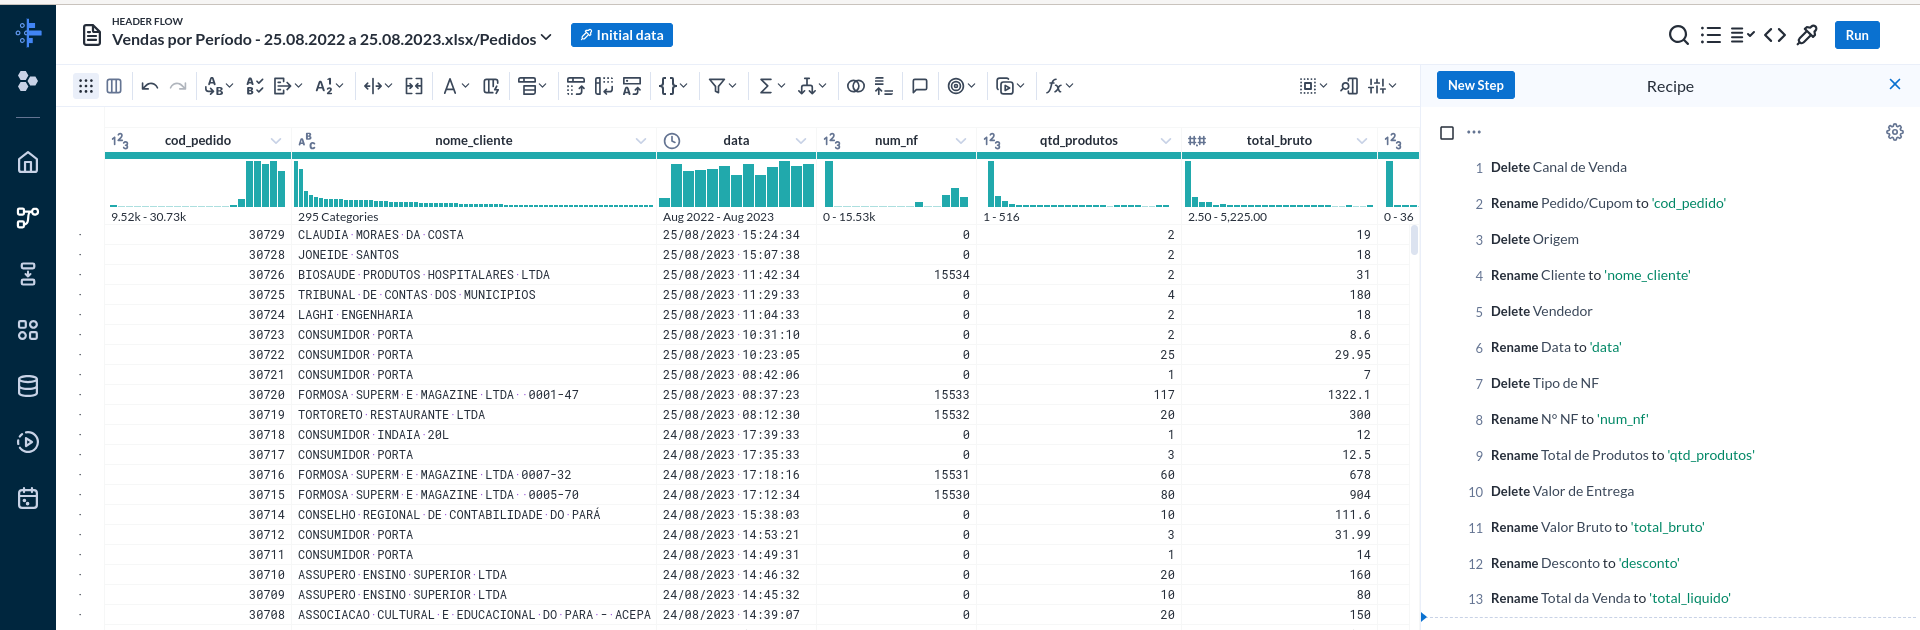

Ao final, um job grava os dados no bucket "Raw Data" no GCS.

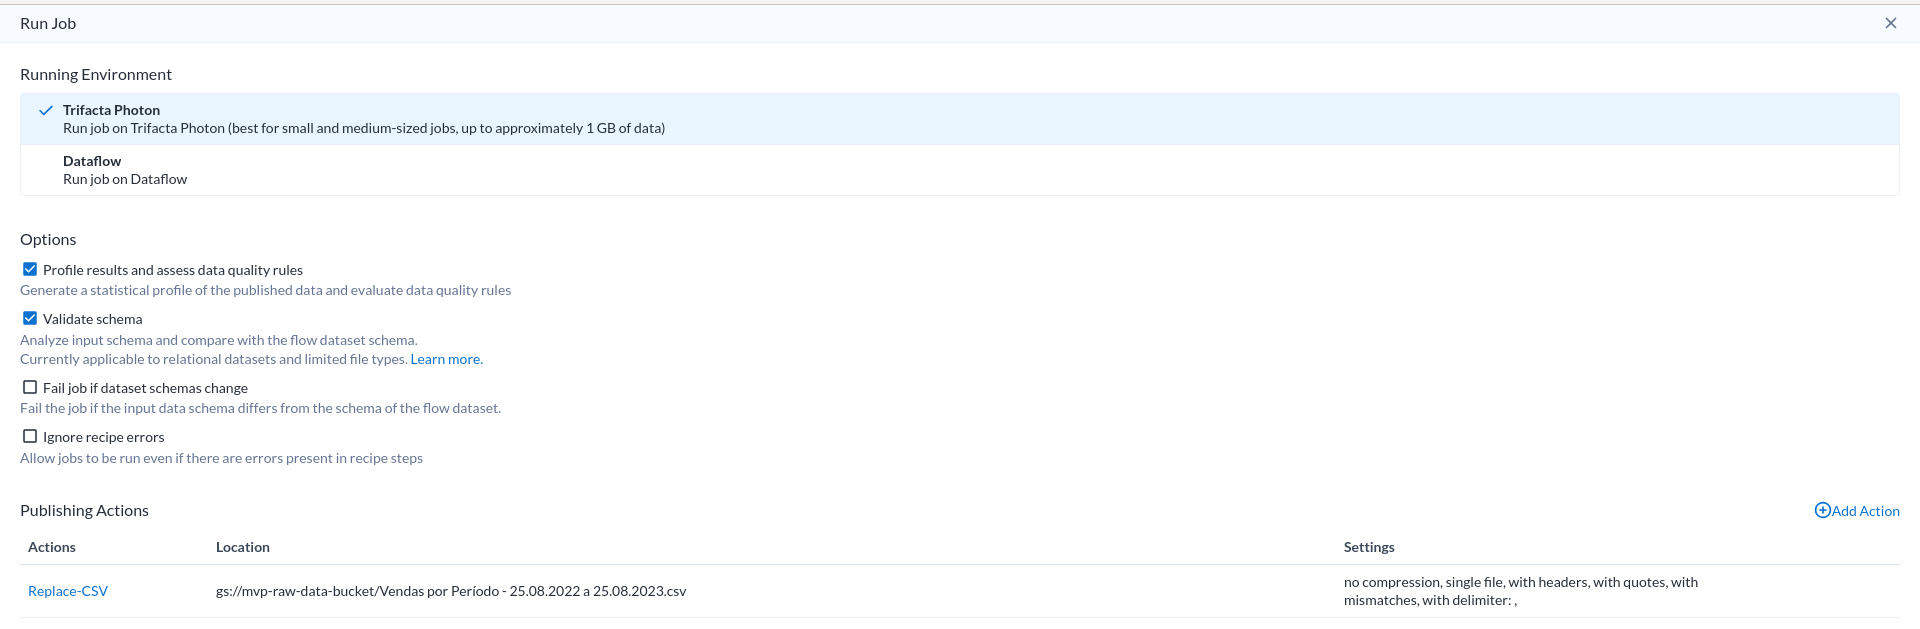

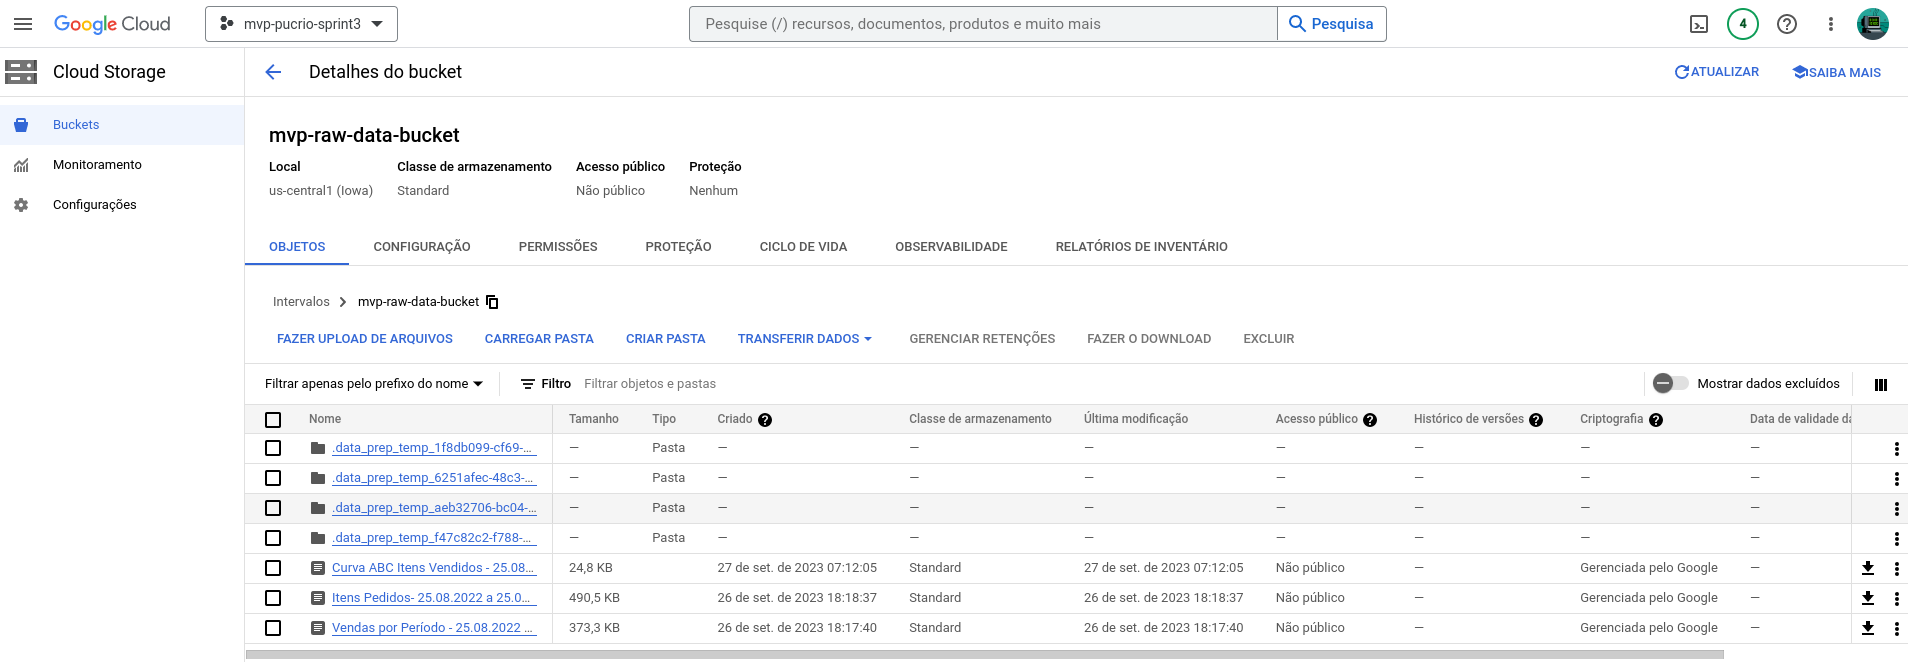

Com os arquivos em formato adequada para serem tratados pelo Data Fusion, seguimos para a criação dos pipelines de transformação de dados.

Como as perguntas elencadas no problema são centradas em informações sobre pedidos de venda e os itens constantes desses pedidos de venda, classificados pela análise ABC de itens vendidos, optamos por criar duas tabelas resultantes do processo de ETL: **tb_pedido_venda** e **tb_itens_pedido**. A segunda, resultado de uma operação de JOIN entre a planilha de 'Itens Pedidos' e a planilha 'Curva ABC', para agregar aos itens a informação sobre qual grupo pertencem.

Constatamos no desenvolvimento do pipeline que, diferentemente da ferramenta Dataprep, o Data Fusion não permite em um mesmo pipeline, operar transformações em arquivos diferentes para saídas diferentes, que não estejam conectados. Em função dessa limitação, criamos dois pipelines para produzir o resultado desejado: **pedido-venda-pipeline** e **itens-pedido-pipeline**.

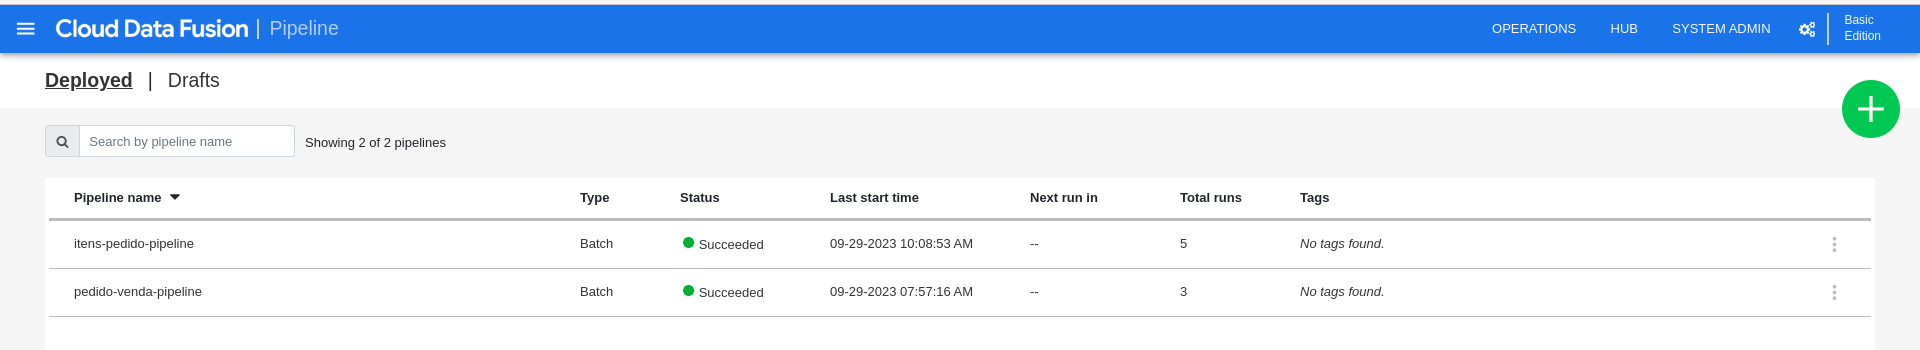

Abaixo o diagrama do pipeline "pedido-venda-pipeline", com saídas para o BigQuery e armazenamento do arquivo resultado no GCS.

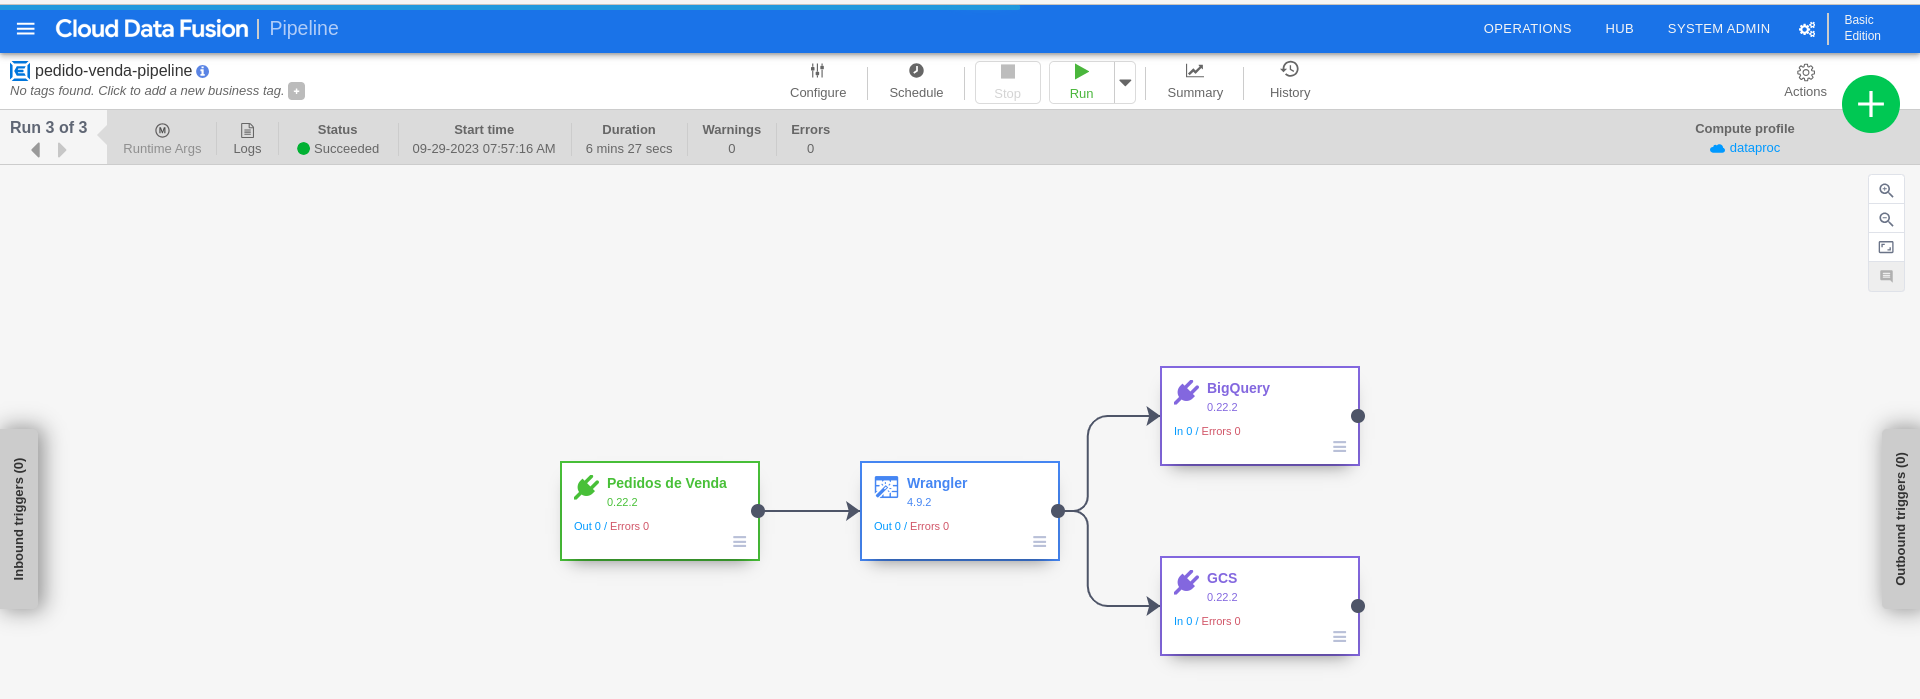

As operações se concentraram em conversões de tipo e ajuste de caracteres indevidos.

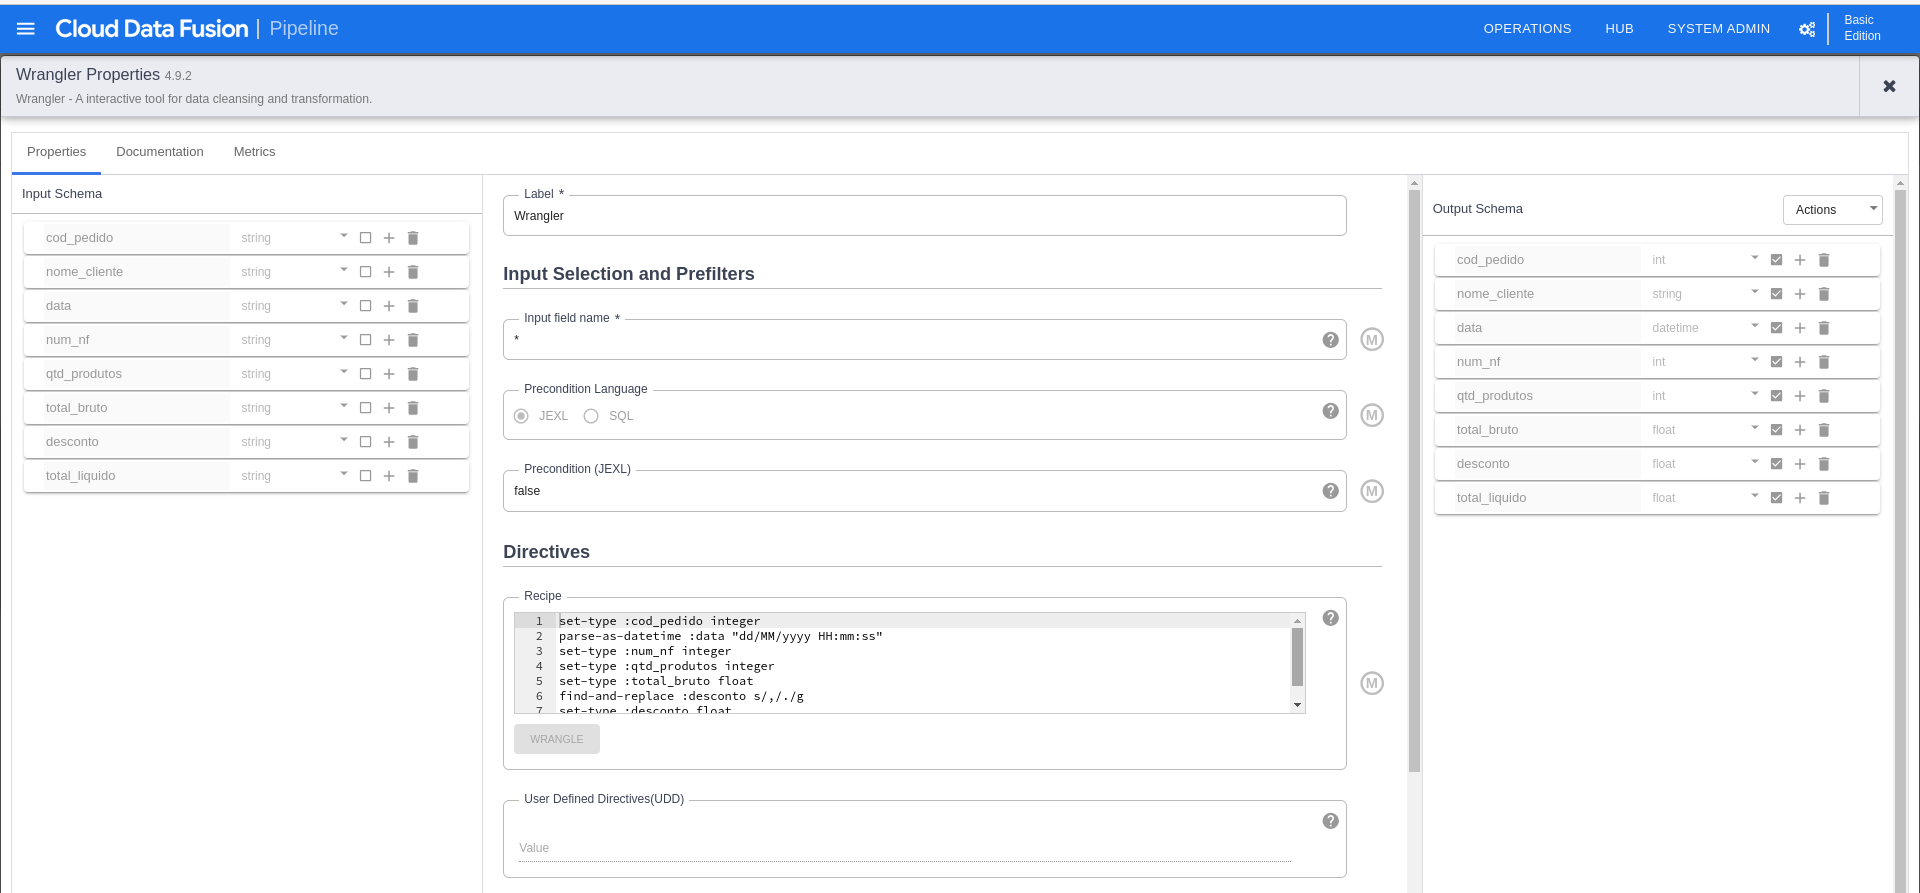

Abaixo o diagrama do pipeline "itens-pedido-pipeline", com saídas para o BigQuery e armazenamento do arquivo resultado no GCS. Nota-se o elemento de junção das fontes de dados, com a coluna "nome_produto" sendo usada como chave de junção.

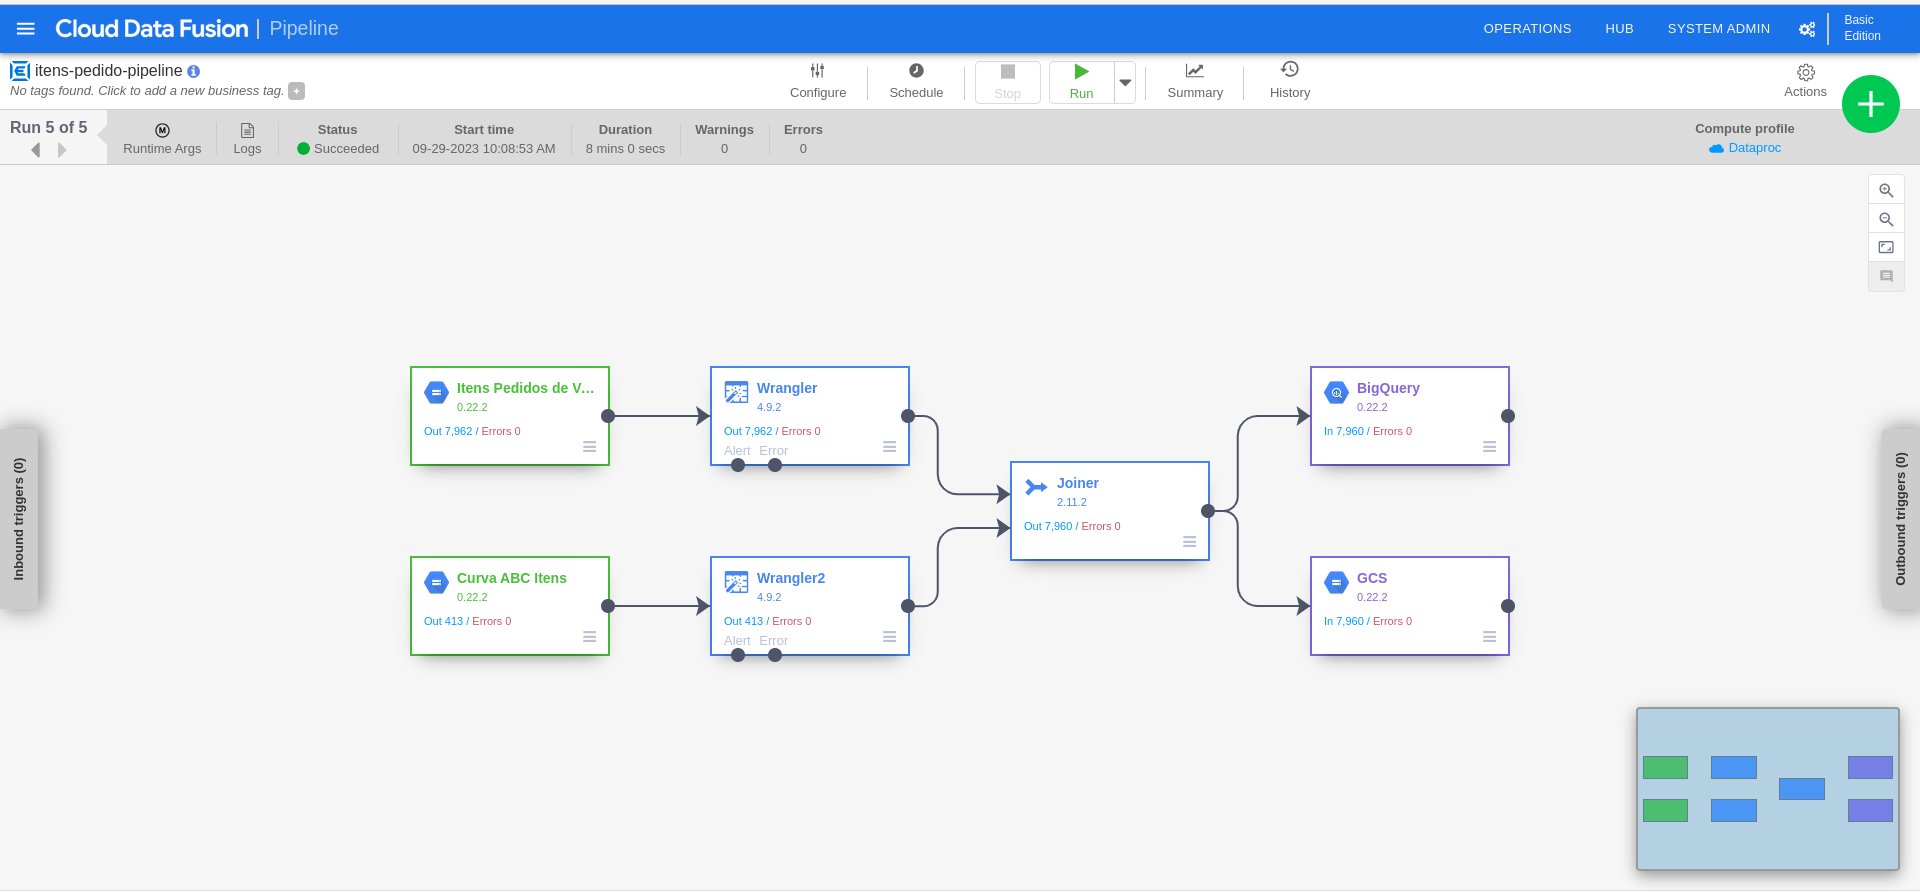

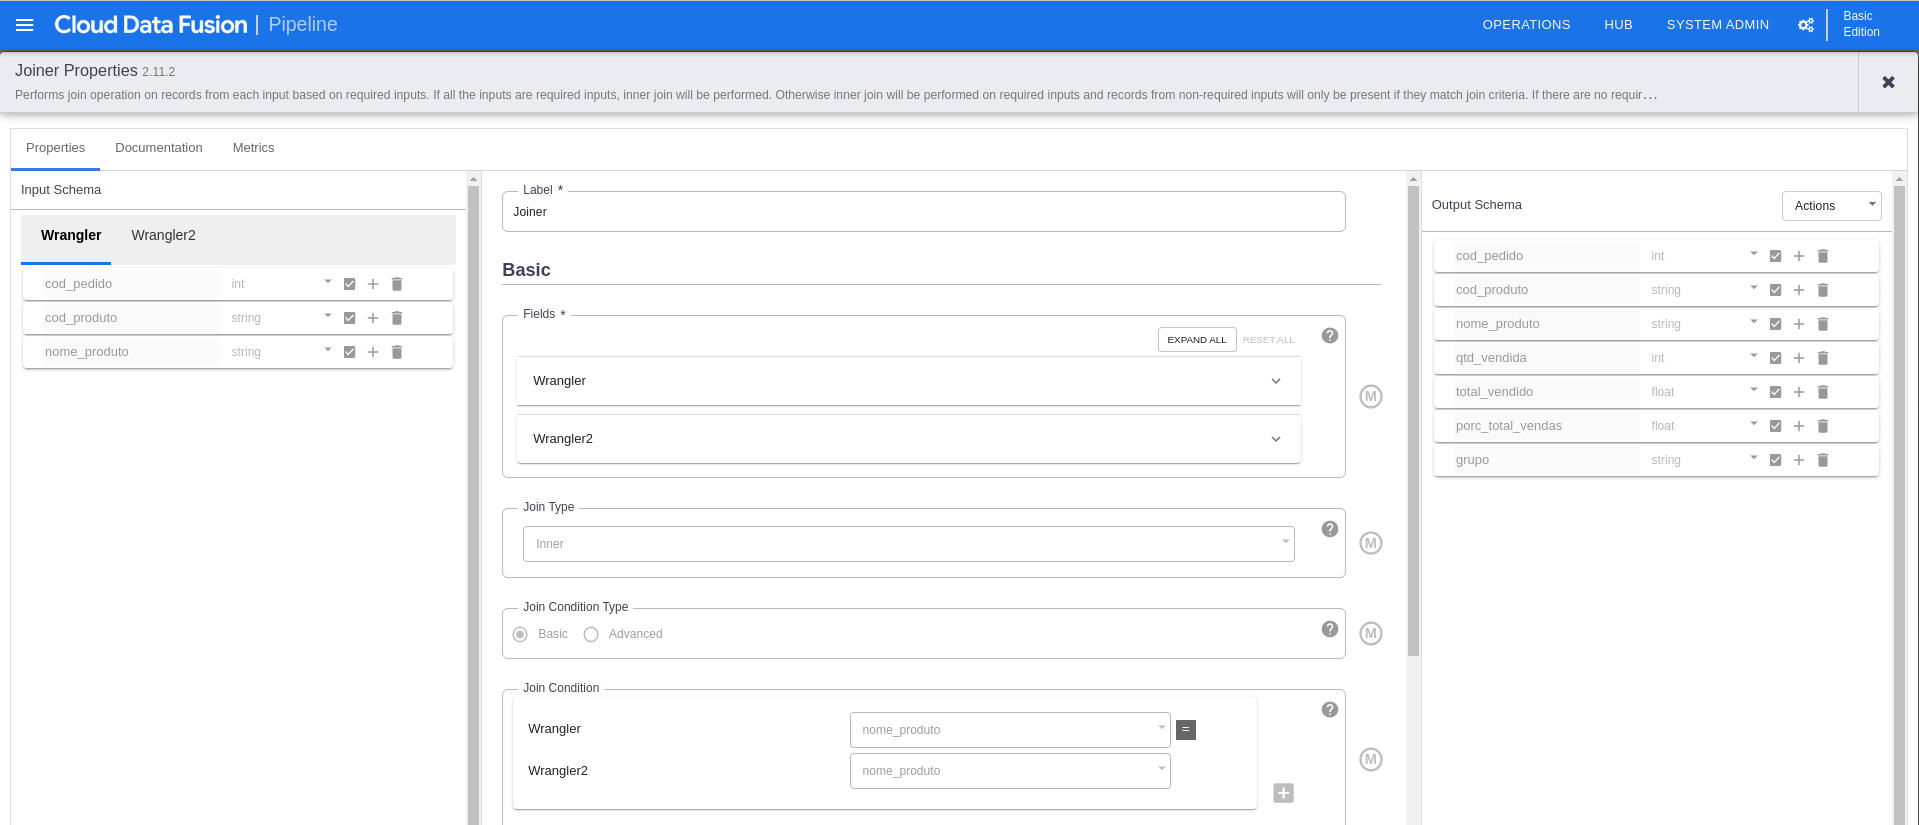

## Análise

O BigQuery é o serviço de análise de Big Data do Google Cloud. Com ele é possível conectar a diversas fontes de dados, definir esquemas de dados e estruturas auxiliares e realizar consultas aos dados por meio de SQL.

Com os pipelines criados e executados, foram criados os datasets e respectivas tabelas no Big Query para realizar as análises dos dados: tb_pedido_venda e tb_itens_pedidos. A partir das tabelas criadas, elaboramos consultas SQL para responder as perguntas elencadas no problema do presente trabalho. Abaixo, um screenshot dos recursos criados:

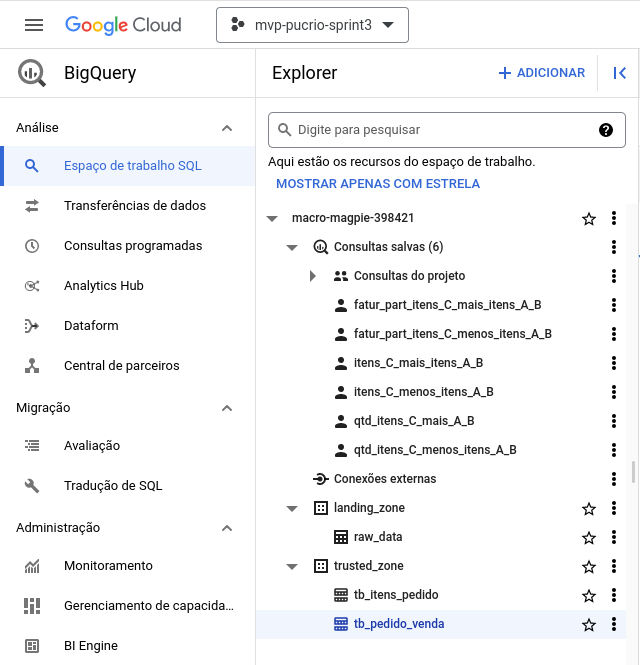

Abaixo o esquema da tabela tb_pedido_venda.

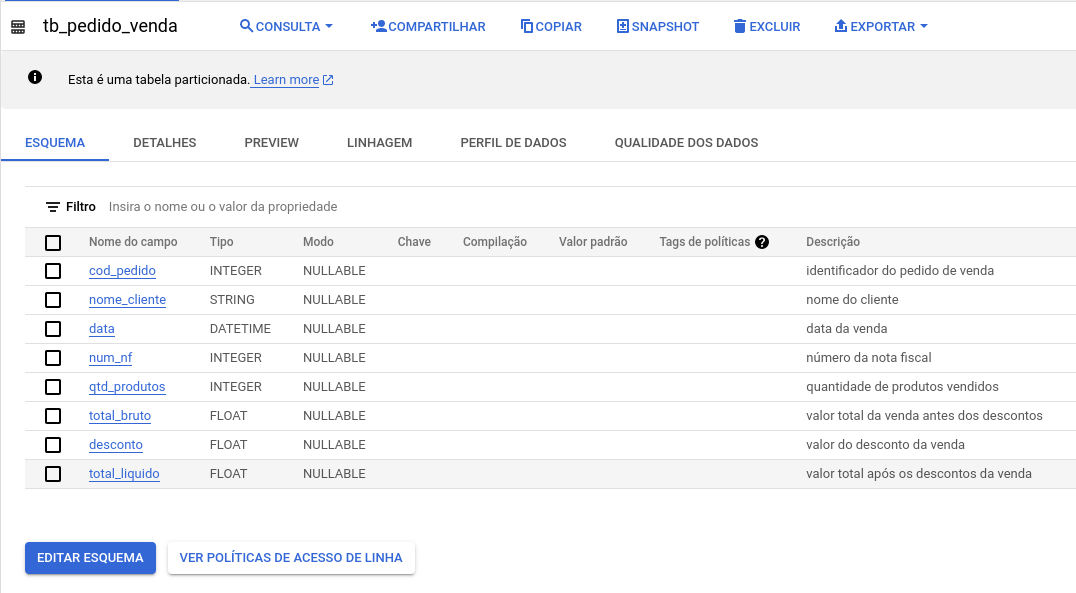

Na sequência, a linhagem de dados da mesma tabela, gerada automaticamente pelo Data Fusion. O arquivo fonte aparece dividido em três partes em razão do processamento do pipeline Data Fusion utilizar clusters Dataproc (processamento de dados em sistemas distribuídos), quebrando o arquivo em diferentes partes pelo cluster.

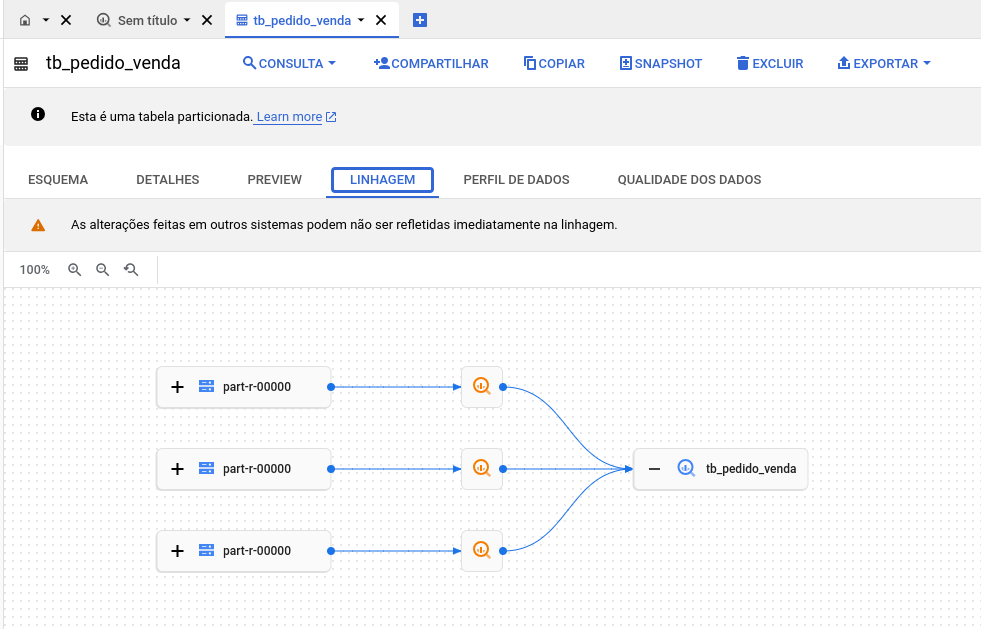

Abaixo, screenshots do Perfil de Dados da tabela tb_pedido_venda, gerado pela própria ferramenta BigQuery/Dataplex

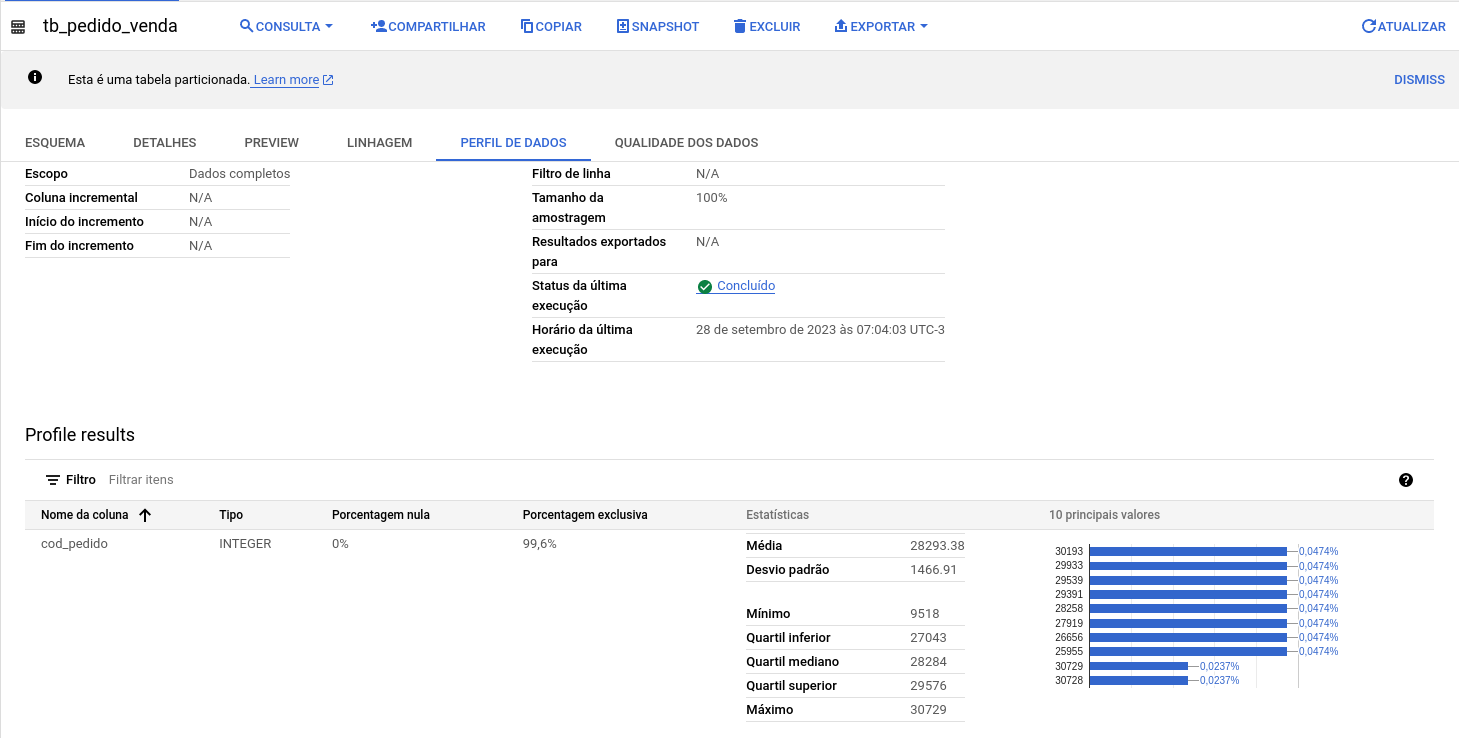

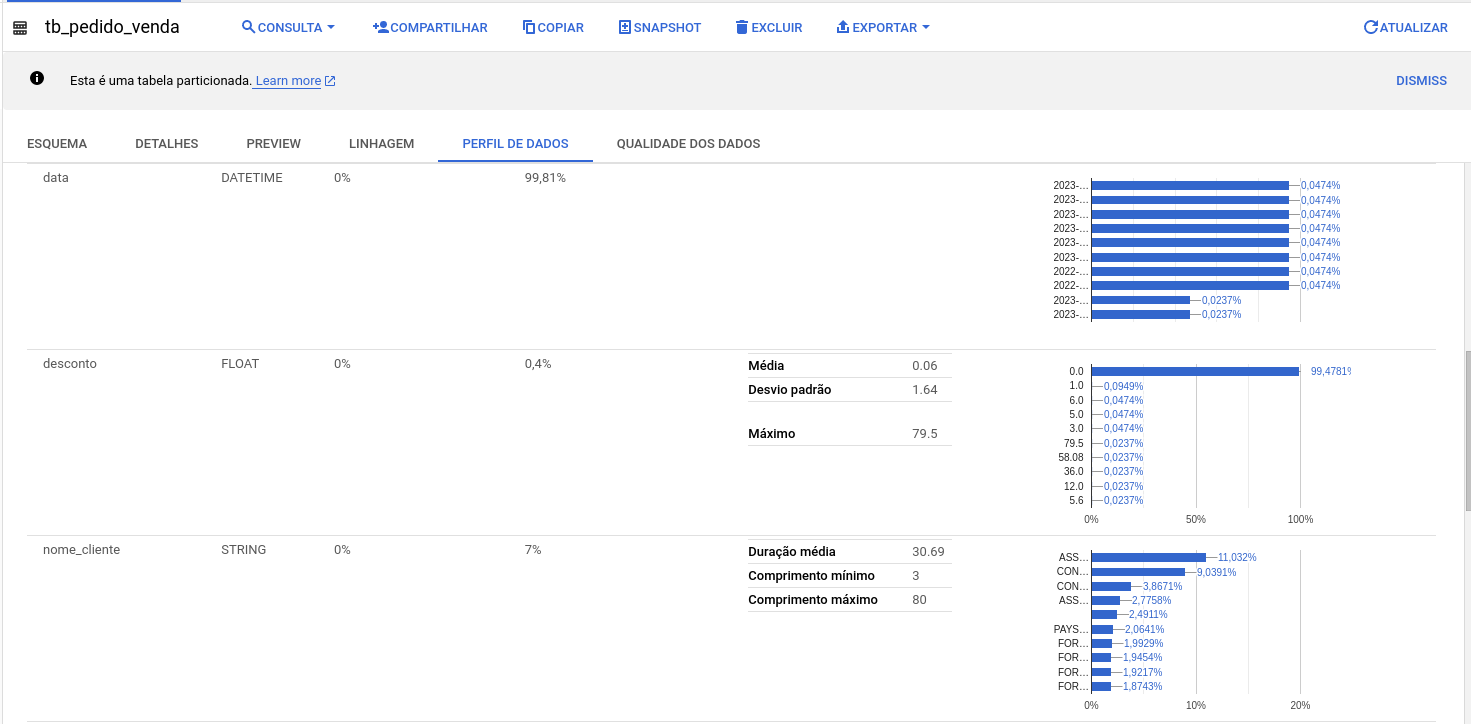

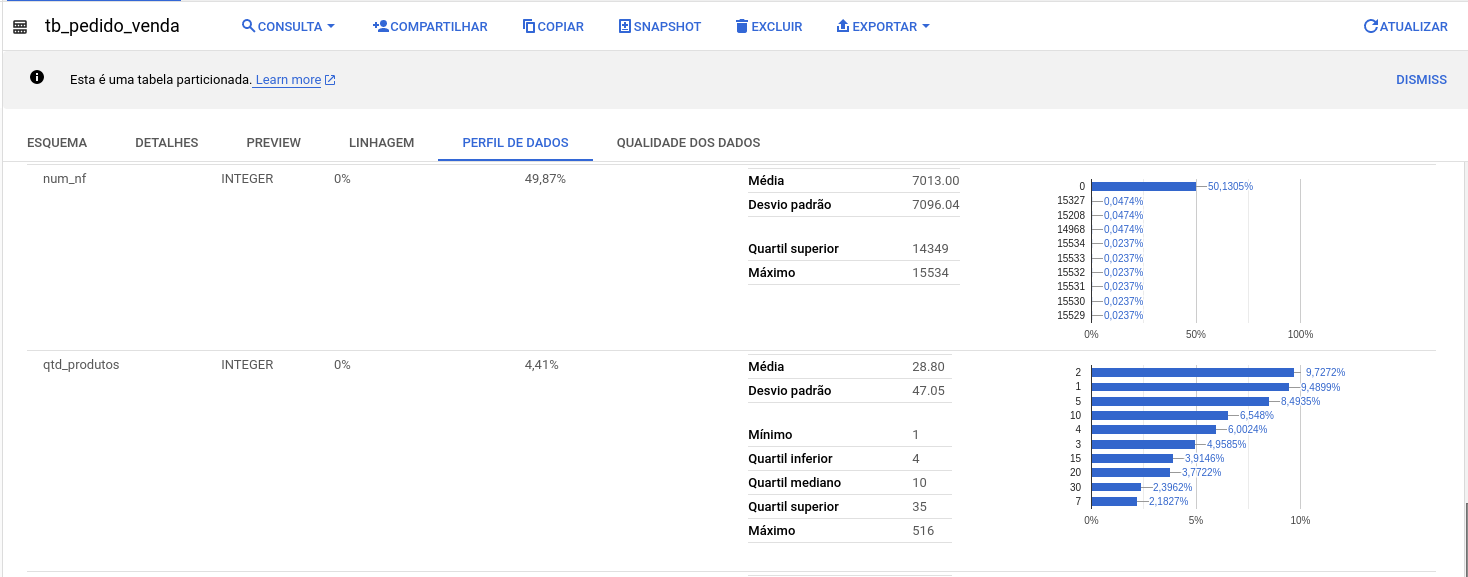

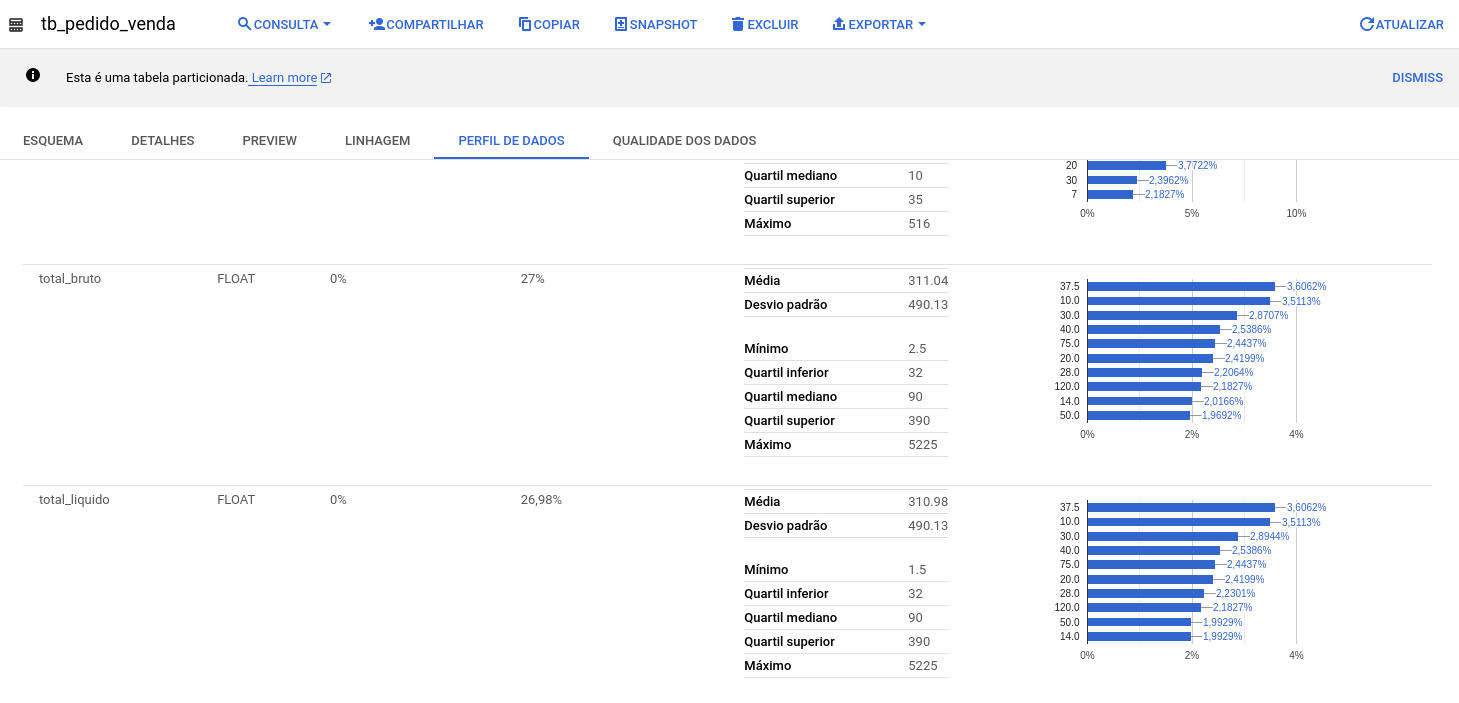

Abaixo o esquema da tabela tb_itens_pedido.

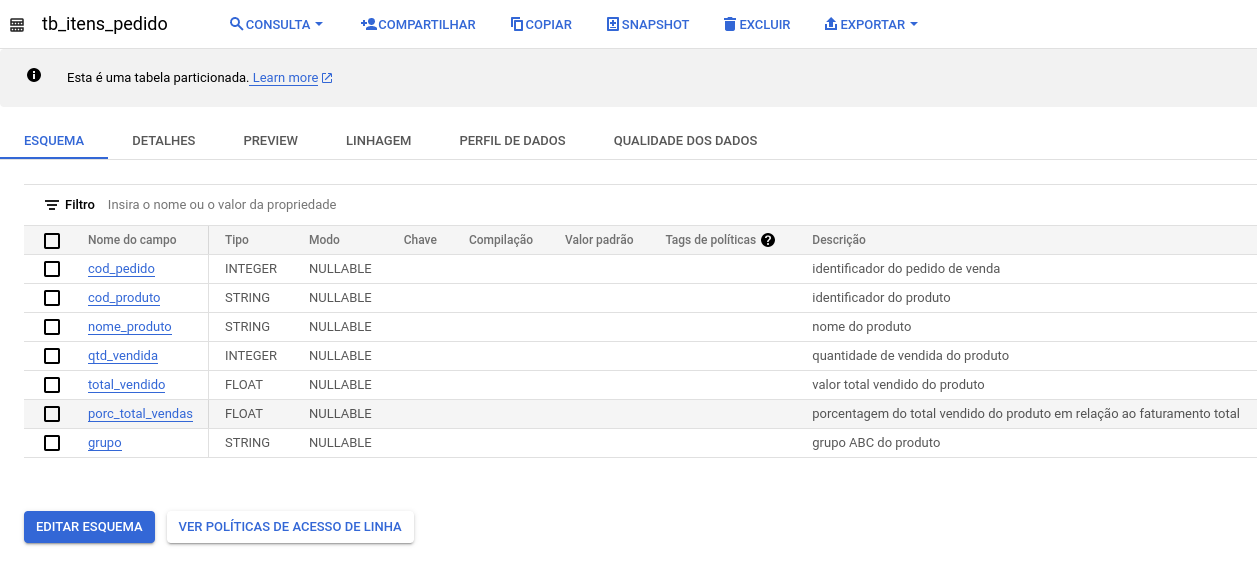

Na sequência, a linhagem de dados da mesma tabela, gerada automaticamente pelo Cloud Data Fusion quando da execução do pipeline.

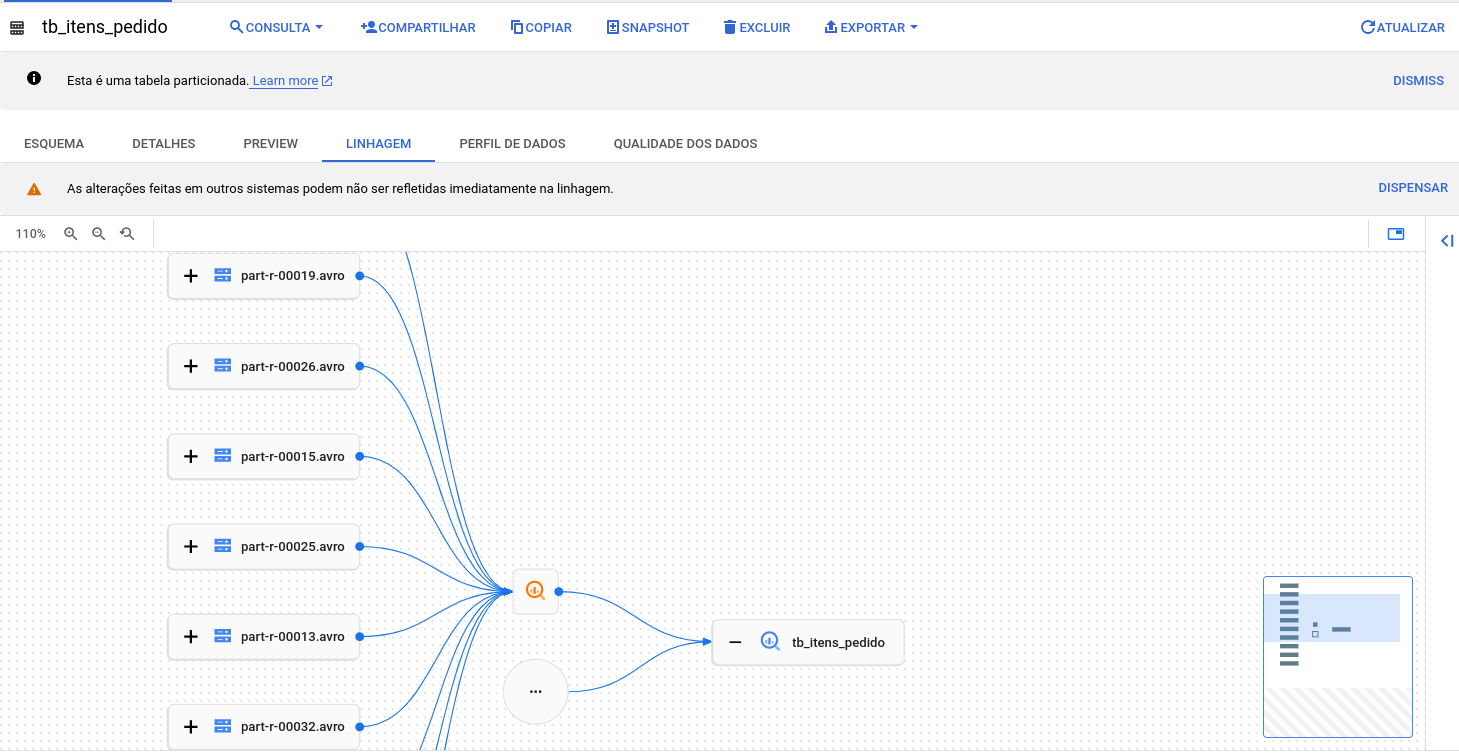

Abaixo, o Perfil de Dados da tabela tb_itens_pedido.

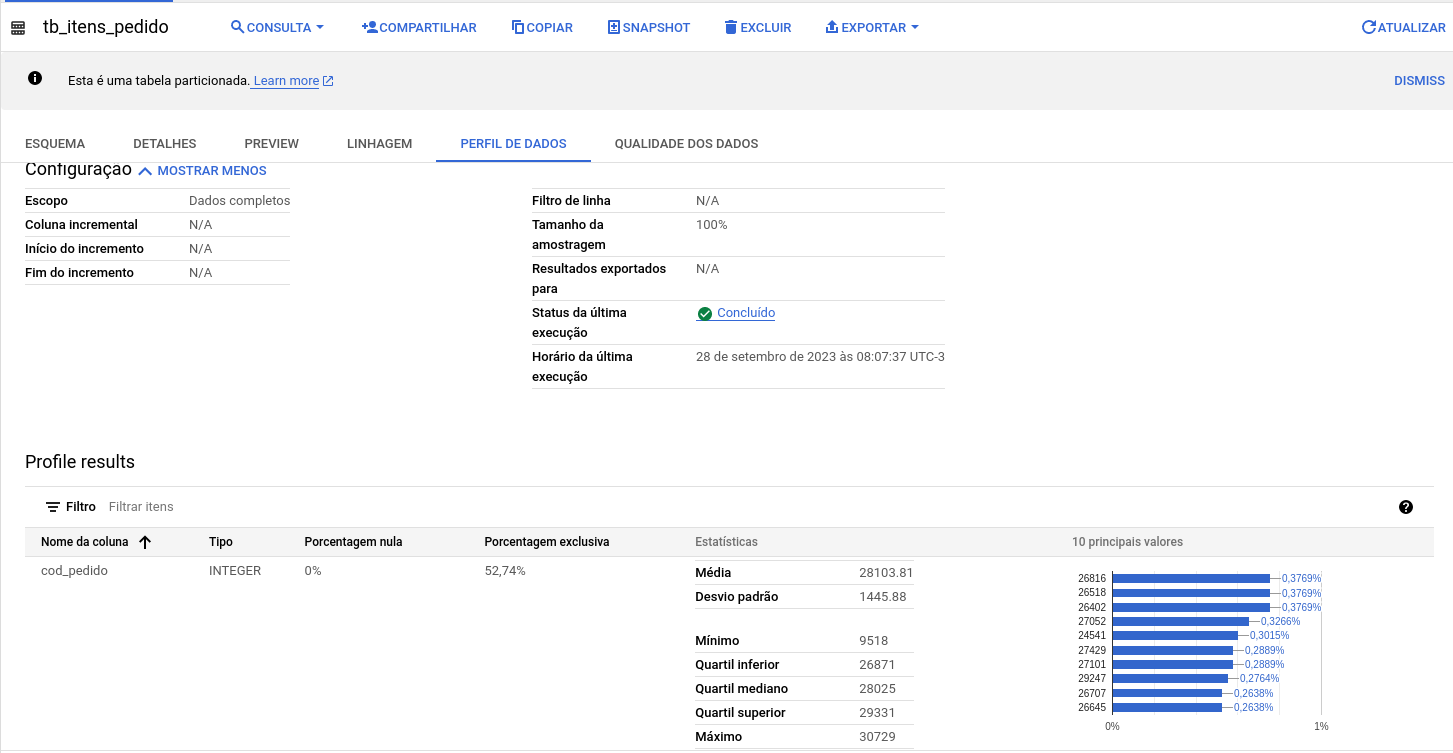

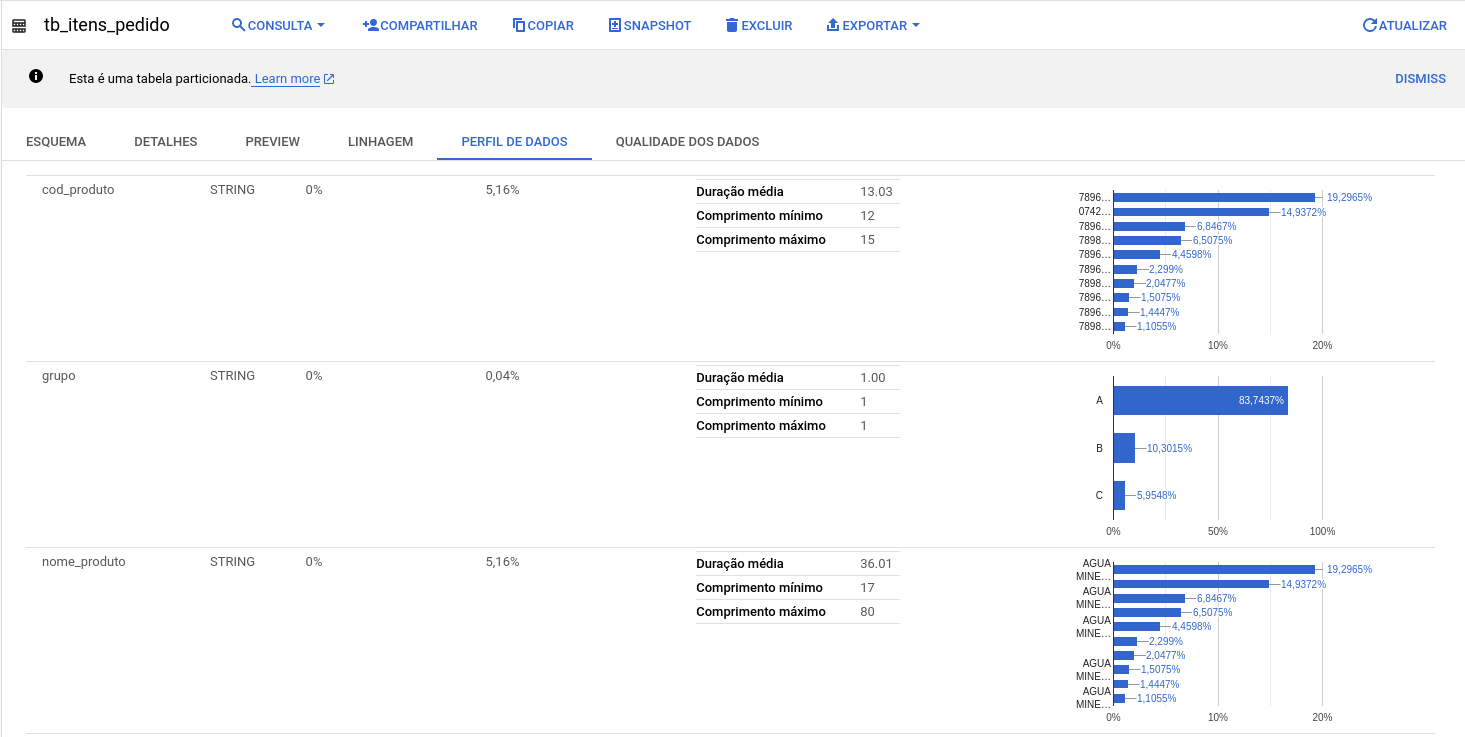

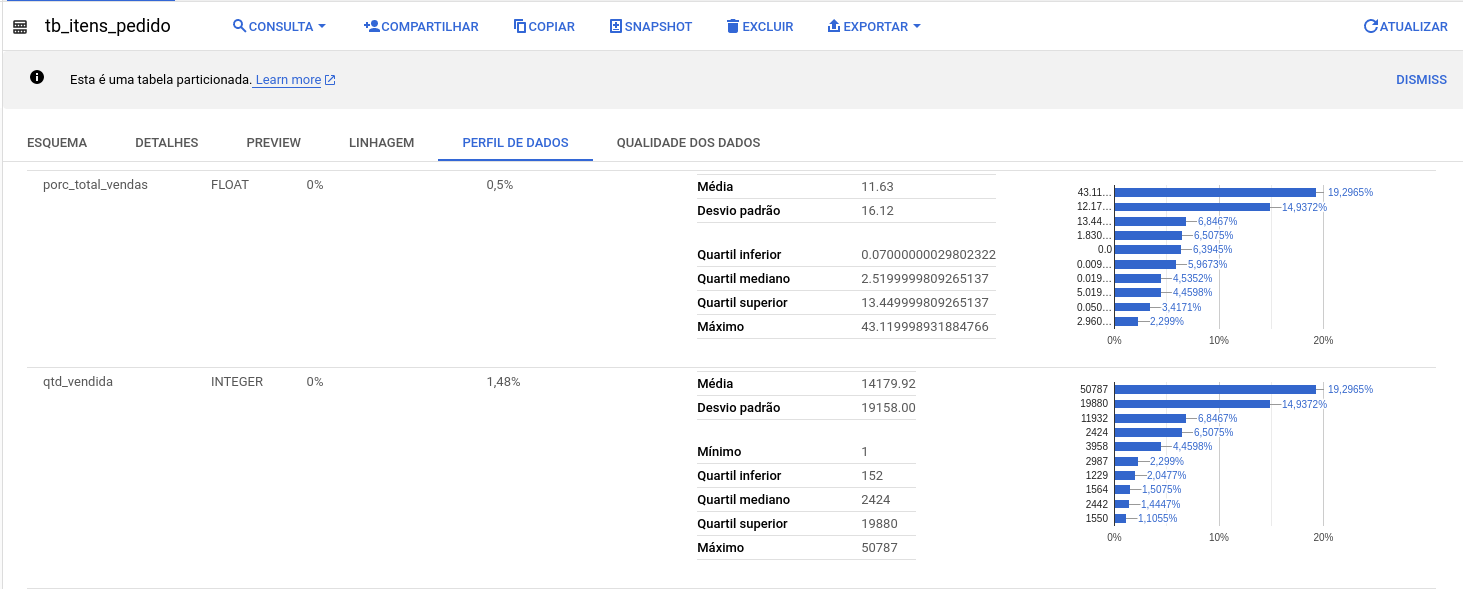

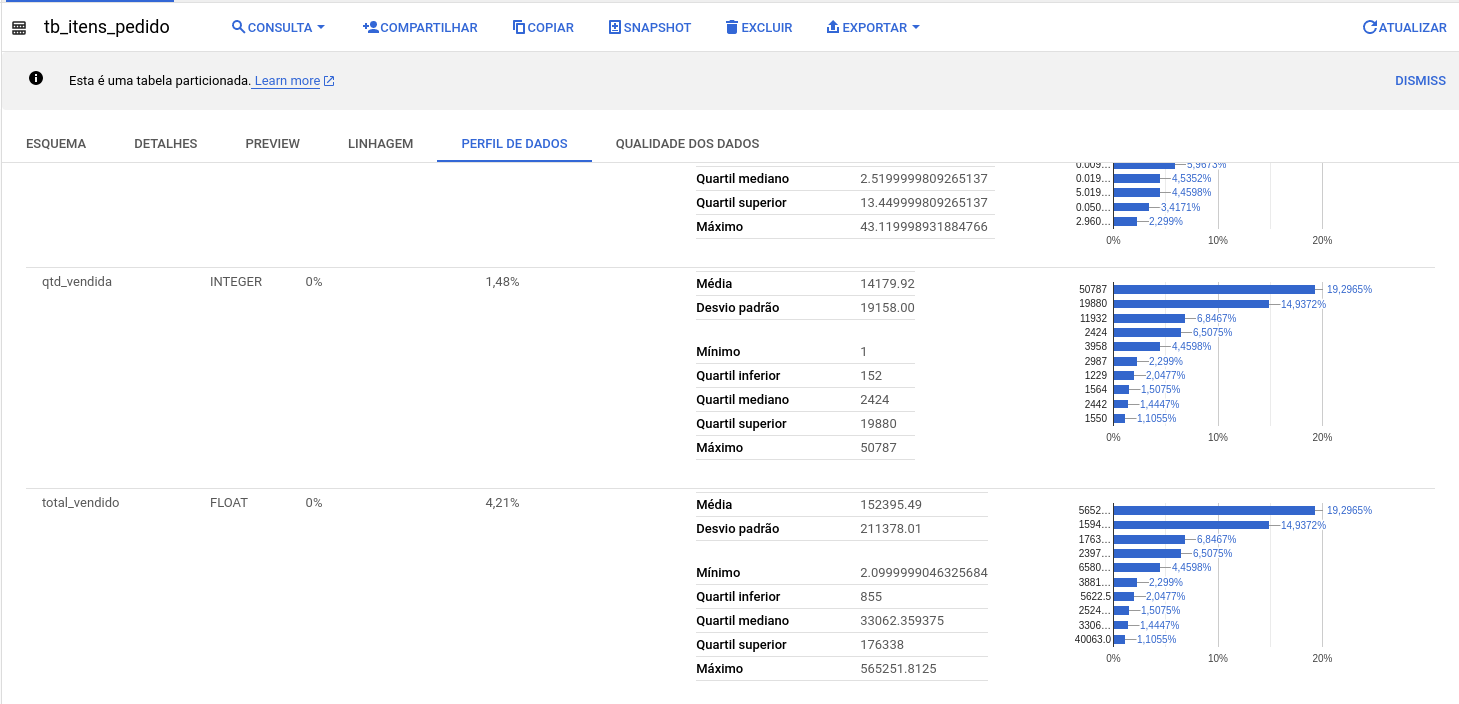

### Qualidade de Dados

Com relação à Qualidade de Dados, implementamos apenas regras básicas de checagem de valor nulo das colunas, uma vez que os conjunto de dados utilizados não apresentam problemas de missing ou de domínio em seus valores. Tal como para Perfil de Dados, o BigQuery possui o recurso de verificação de Qualidade de Dados, para gerar o relatório abaixo sobre a aderência dos dados em relação às regras de qualidade definidas.

Abaixo a verificação de Qualidade de Dados da tabela tb_pedido_venda.

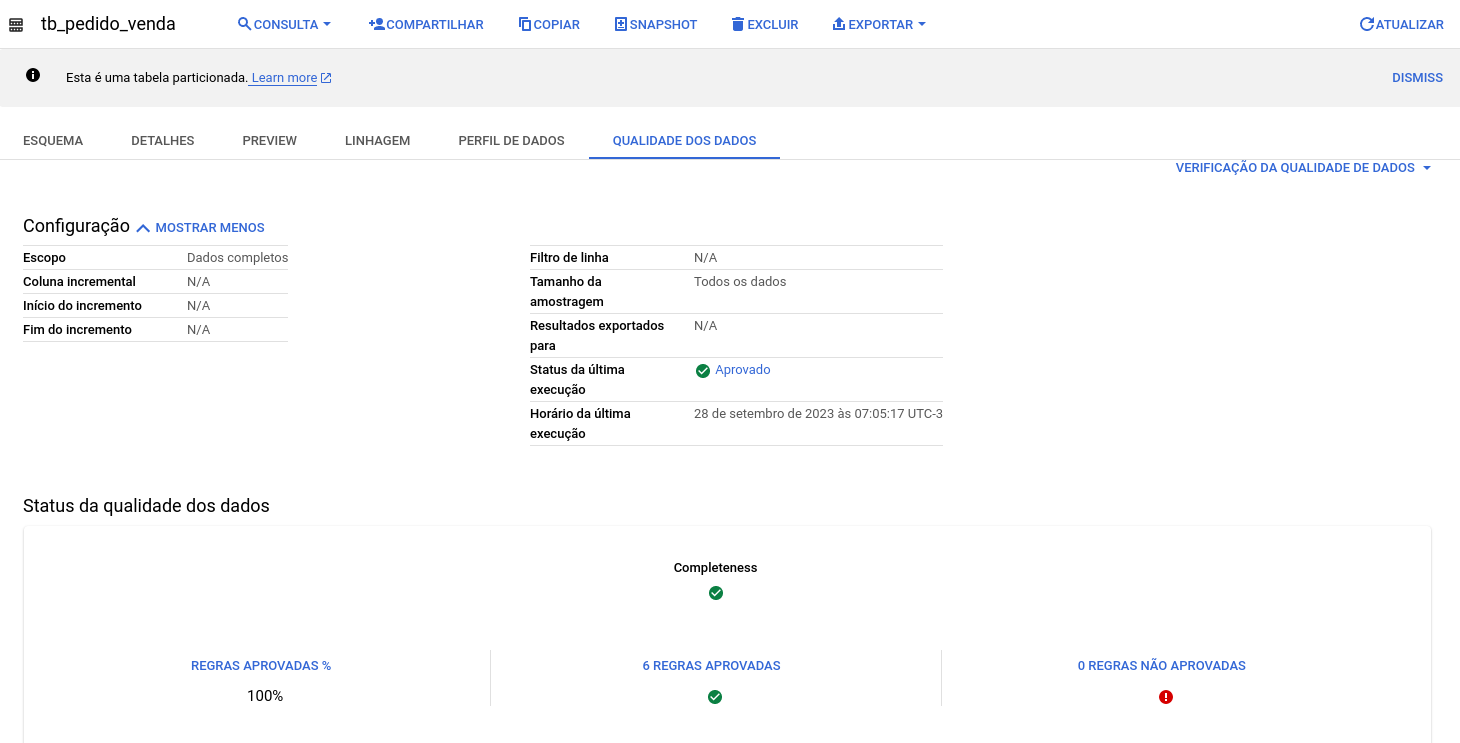

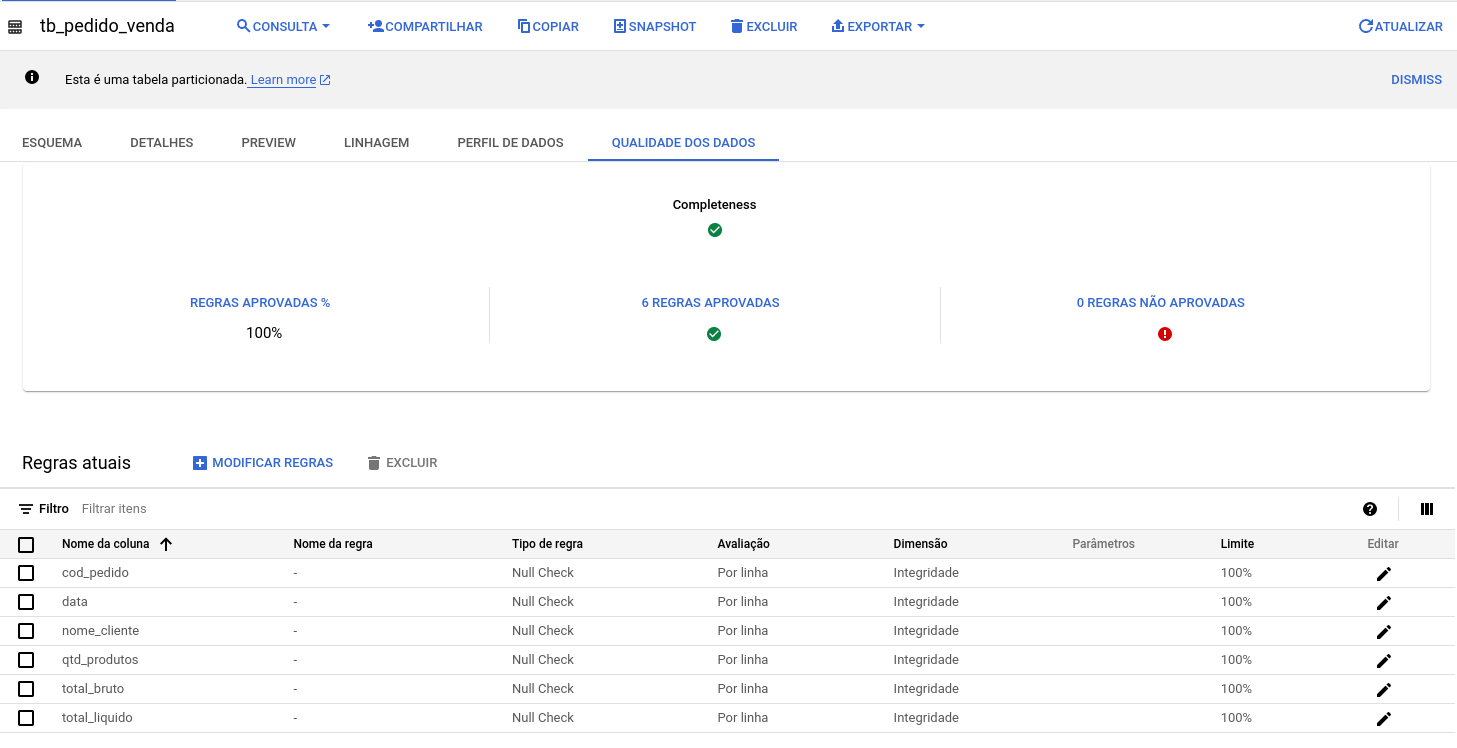

Na tabela tb_itens_pedido, além das regras de checagem de valor nulo, implementamos um regra de checagem de intervalo na coluna "porc_total_venda", por ser uma coluna com valores porcentuais que devem ser estar restritos à ao intervalo 0-100.

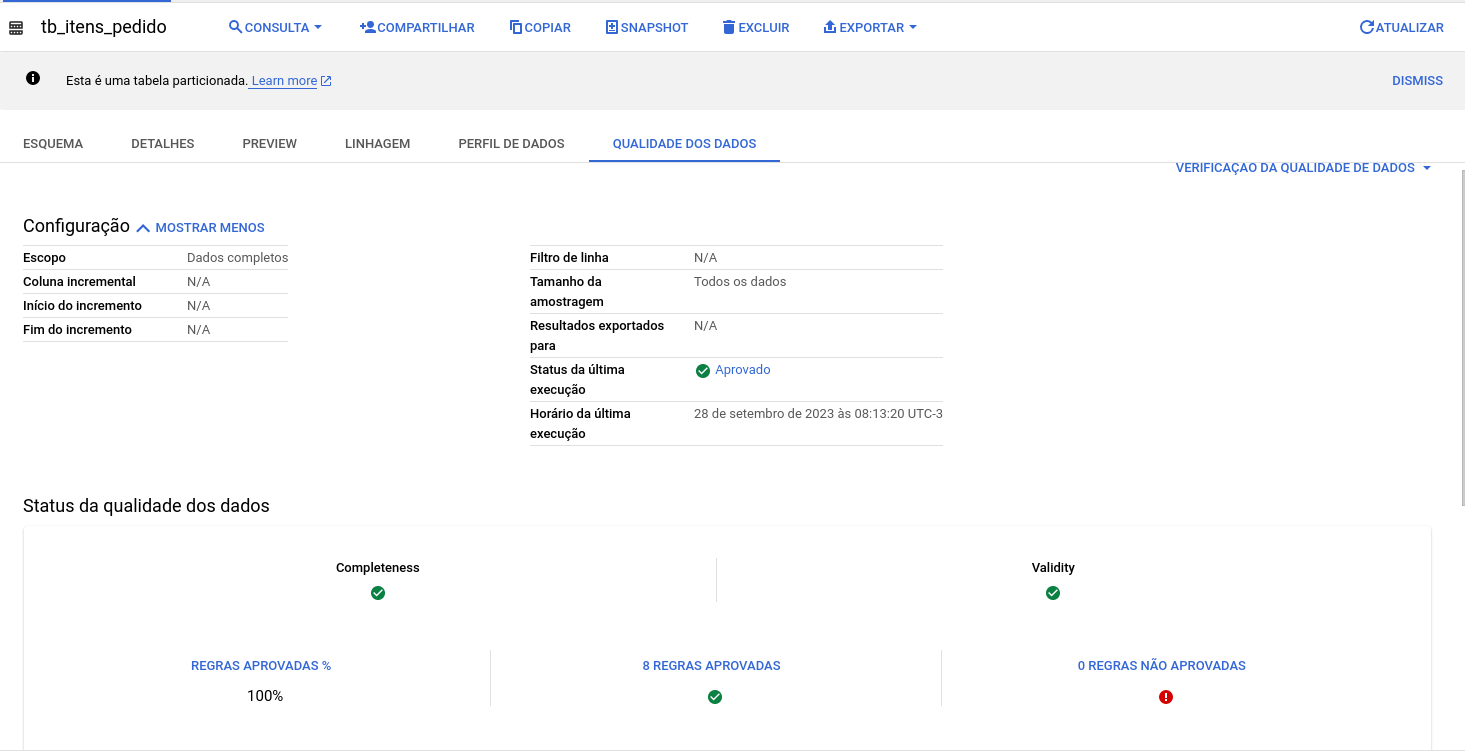

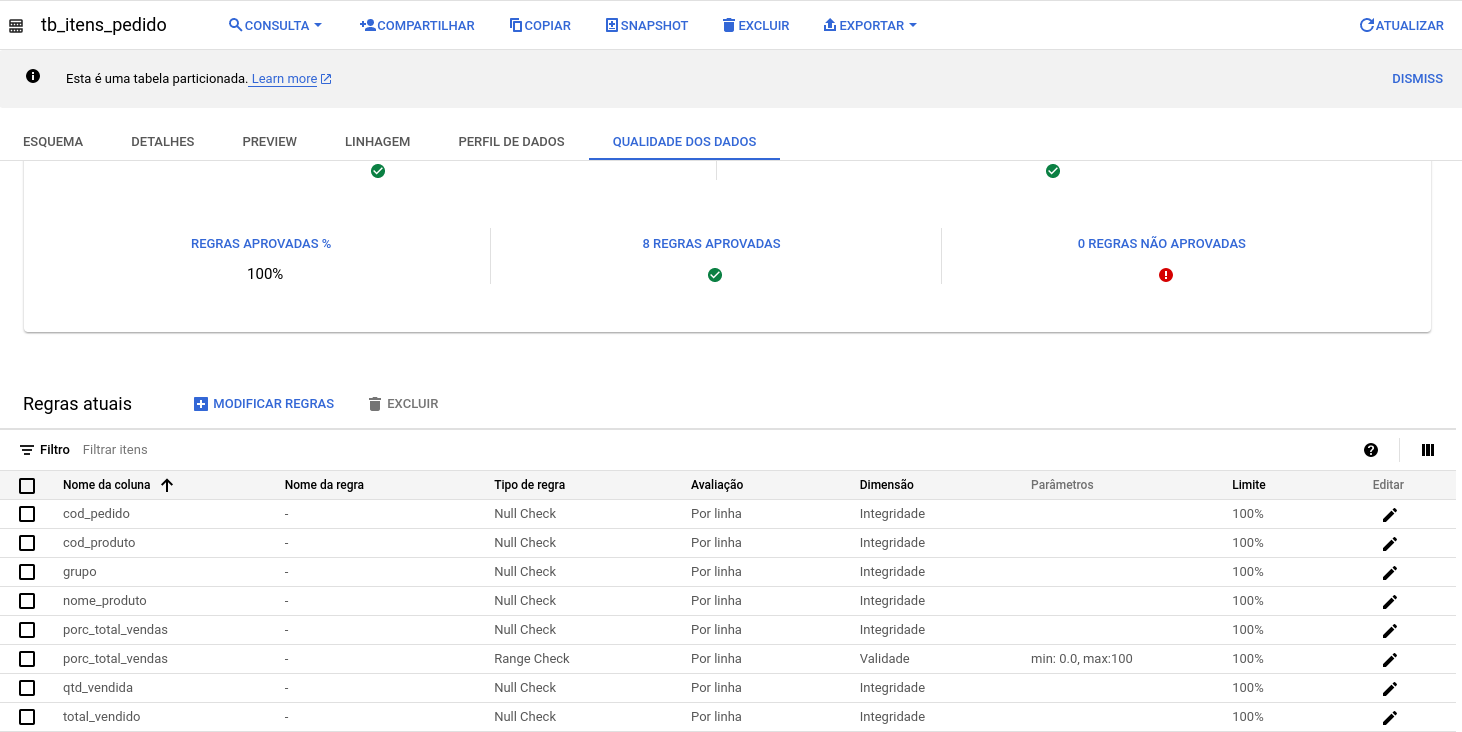

### Solução do Problema

Aqui retomaremos as perguntas definidas para a resolução do problema e exibiremos os screenshots das consultas com as respectivas respostas.

#### Vendas somente com Itens do Grupo C

**(I) Quais itens do grupo C não foram vendidos juntos com outros itens do grupo A ou B?**

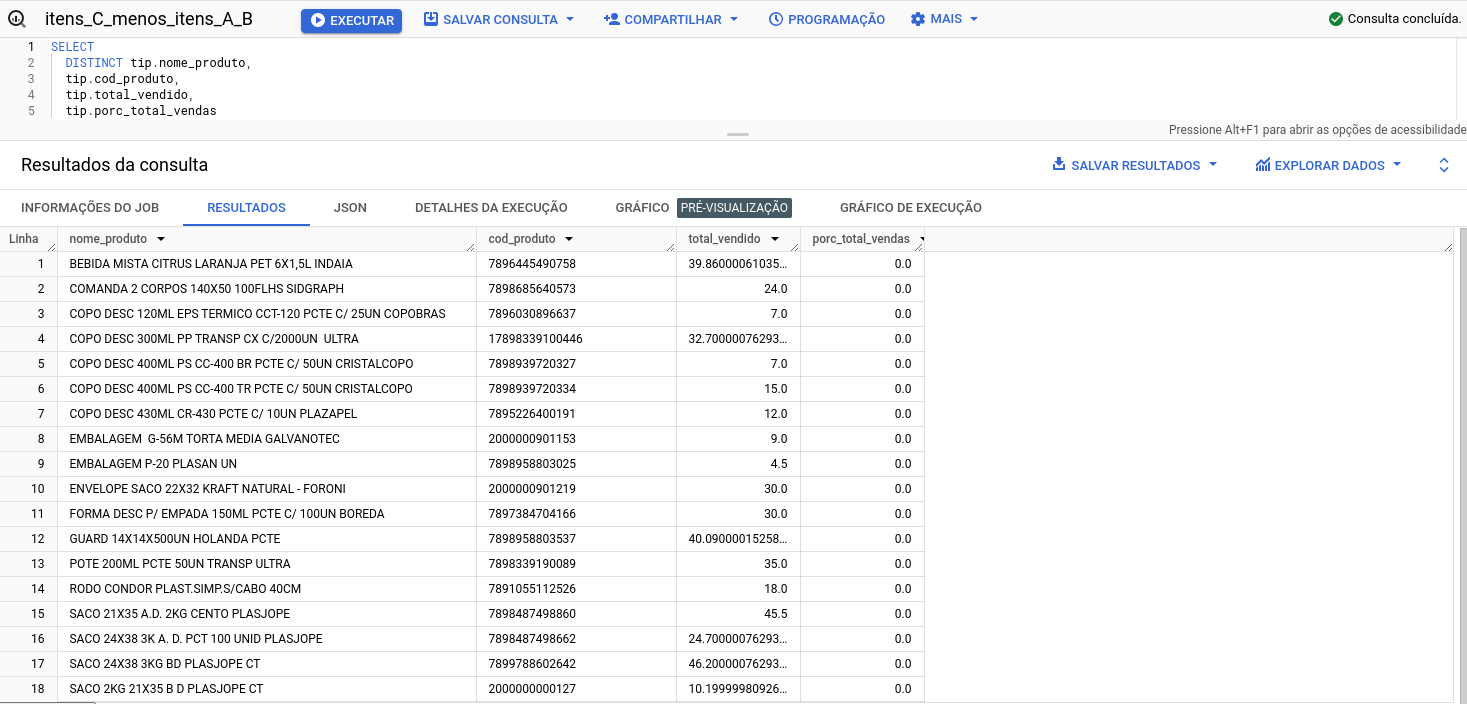

OBS.: a lista acima apresenta apenas uma parte da consulta completa, para fins demonstrativos.

**(II) Qual a quantidade dos itens em (I)?**

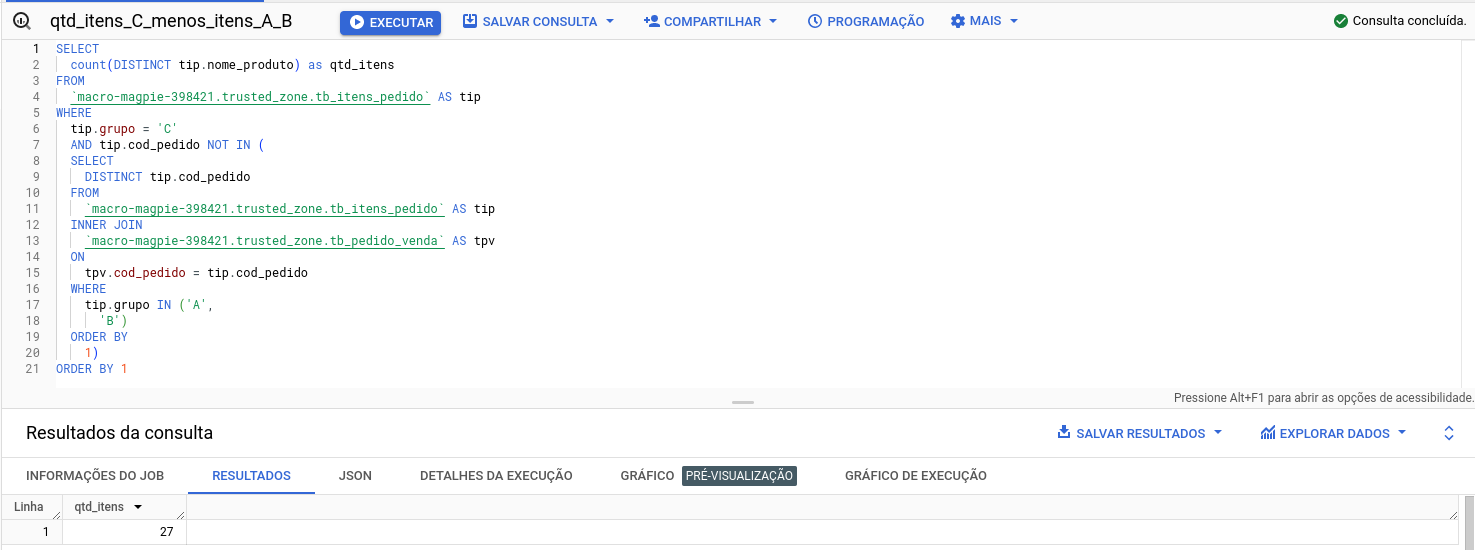

**(III) Qual o total de faturamento e porcentagem em relação ao faturamento total dos itens em (I)?**

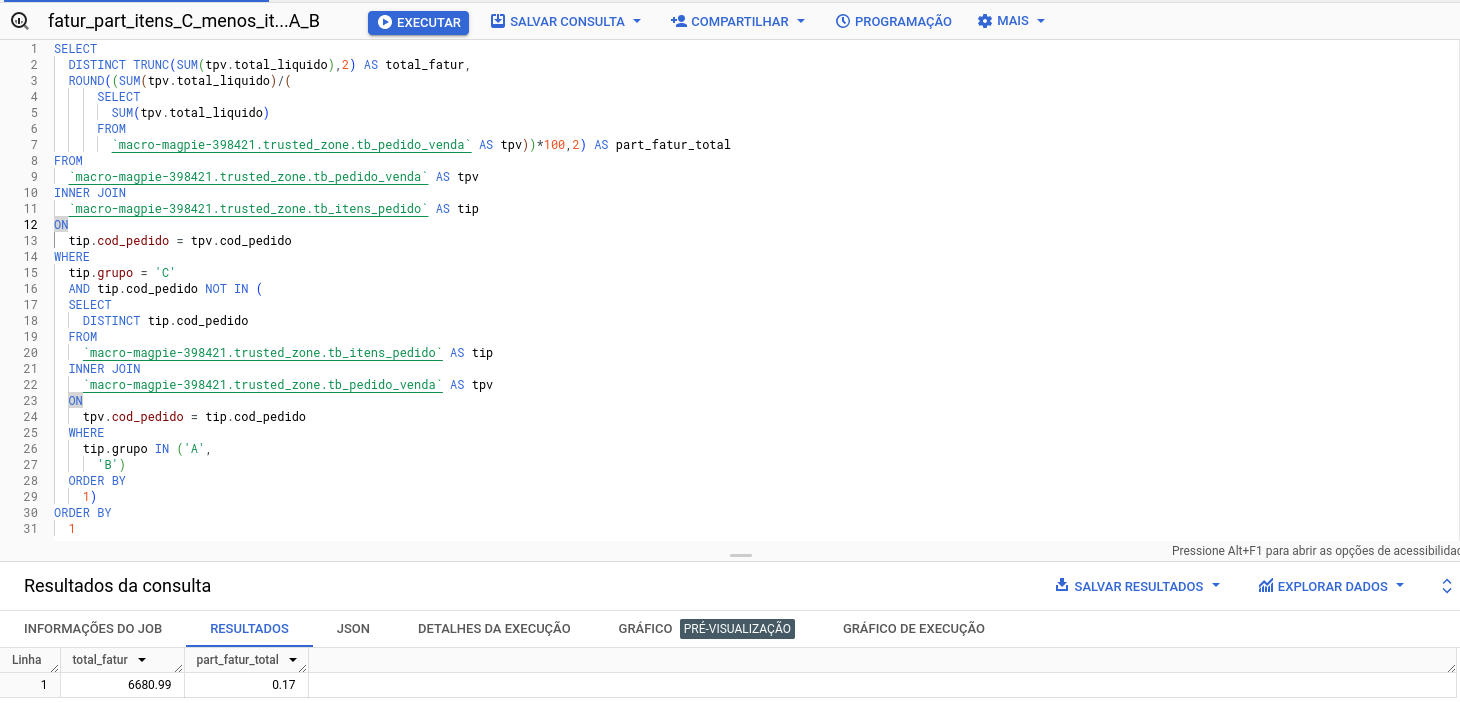

#### Vendas com Itens do Grupo C junto com Itens de outros grupos

**(I) Quantos itens do grupo C foram vendidos juntos com outros itens do grupo A ou B?**

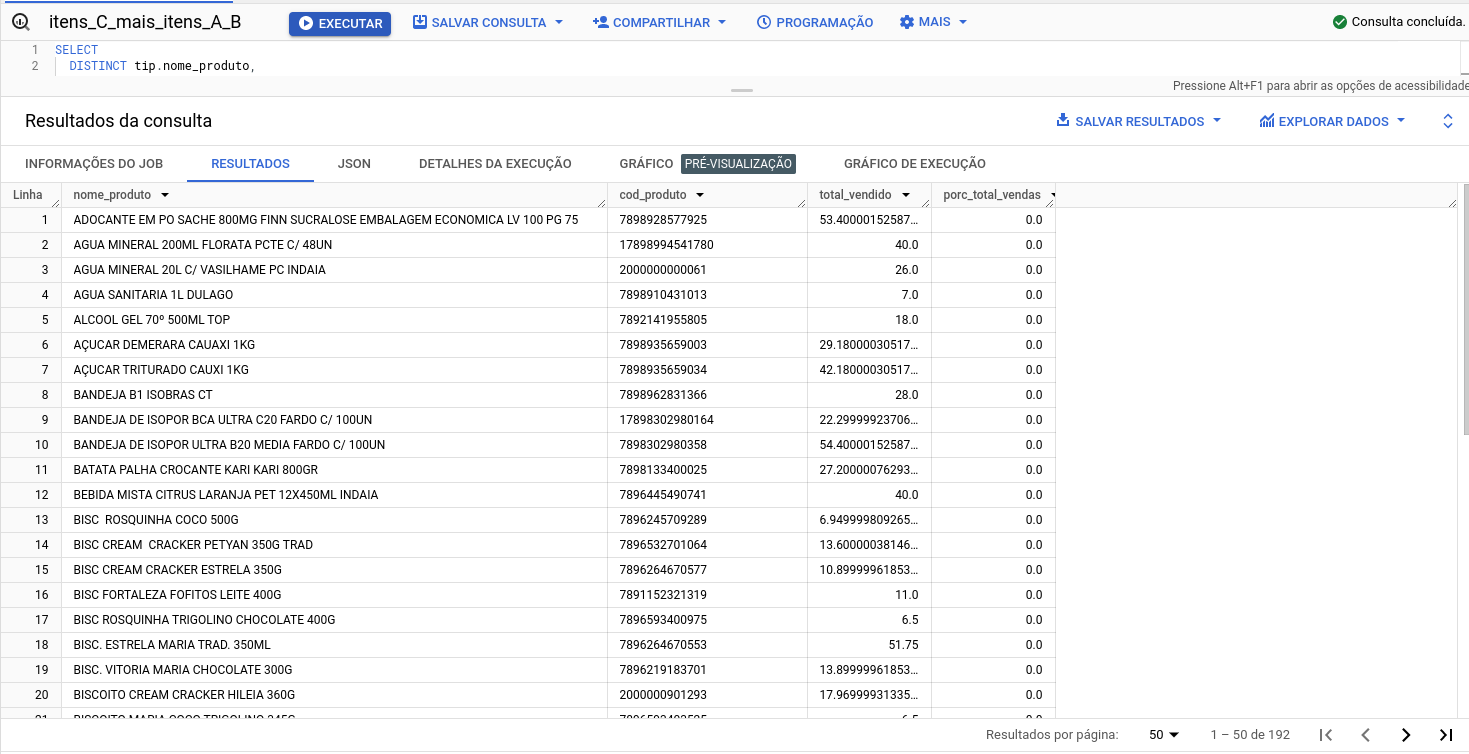

OBS.: a lista acima apresenta apenas uma parte da consulta completa, para fins demonstrativos.

**(II) Qual a quantidade dos itens em (I)?**

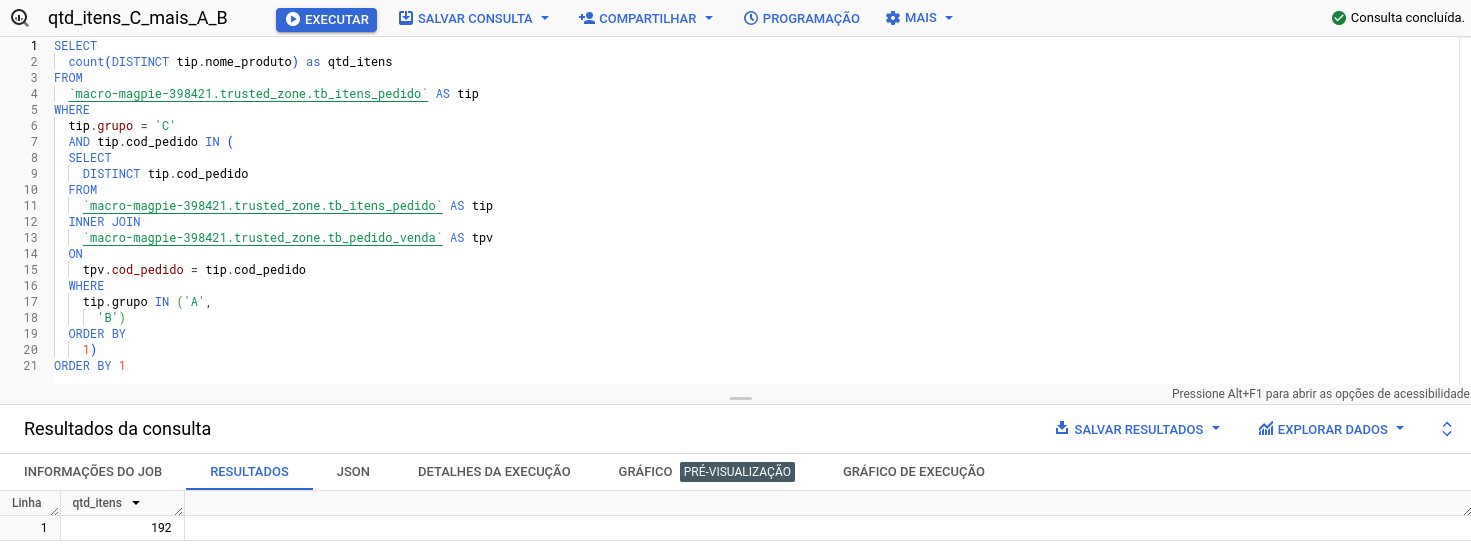

**(III) Qual o total de faturamento e porcentagem em relação ao faturamento total dos itens em (I)?**

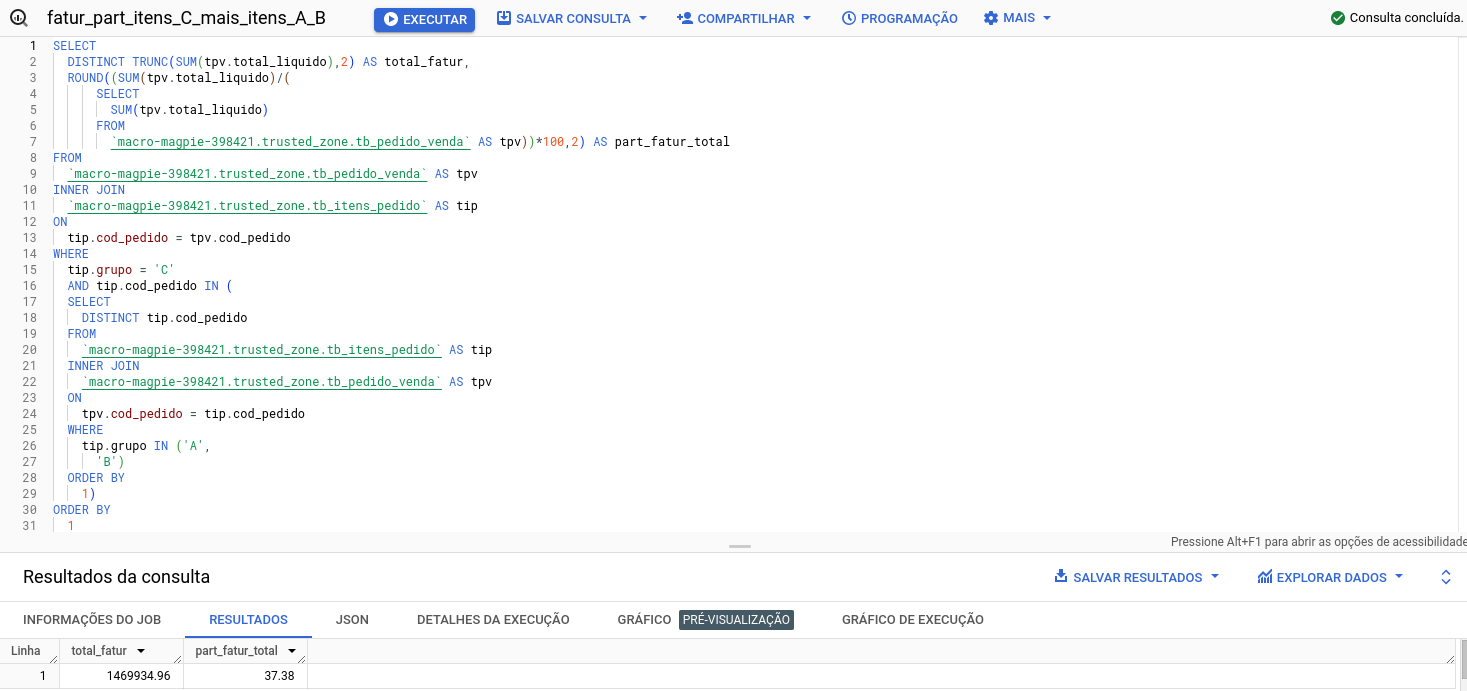

Com base nas resposta coletadas através das consultas SQL aos dados dos relatórios, podemos observar que a eliminação dos itens do Grupo que não participam de vendas com itens de outros grupos mostra-se viável, uma vez que o o valor total de suas vendas, em um período de um ano, corresponde apenas à 0,17% do faturamento total da empresa XPTO.

No entanto, a eliminação de itens do grupo C que compõem vendas com itens de outros grupos não parece ser viável, uma vez que tais vendas correspondem a uma fatia substancial do faturamento total, tendo um participação de 37,38% no período analisado.

#### Autoavaliação

As maiores dificuldades encontradas ao longo do trabalho foram dificuldades relacionadas ao entendimento sobre o funcionamento da plataforma de Cloud, pois a mesma é bastante abrangente em seu catálogo de ferramentas, e estas por suas vez, muitas vezes trabalham de forma integrada. Essa noção, de como ocorre essa integração, e a visão do todo, de como organizar de forma sequencial o uso das diversas ferramentas para a consecução do trabalho foi uma das dificuldades encontradas.

Outra dificuldade a pontuar foi em relação especificamente às ferramentas de ETL da plataforma Google Cloud. Inicialmente optamos por utilizar a ferramenta Dataprep, que se demonstrou uma ferramenta bastante intuitiva, com interface relativamente amigável para construção dos pipelines de dados. Durante a exploração da ferramenta, praticamente não houve ocorrência de erros com o uso da mesma, tendo o processo seguido de forma fluída.

Porém, ao final do processo, descobri que a referida ferramenta não gerava informação sobre linhagem de dados, o que motivou a troca pela ferramenta Data Fusion.

Esta última, sim, foi uma ferramenta bem mais "travosa" que a primeira. A interface mais rudimentar e mais lenta, aparentava também ser mais antiquada que a primeira. Não raro, ocorriam erros sem mensagens de detalhamento durante o processo de construção do pipeline, sendo o mais notório a dificuldade em lidar diretamente com arquivos Excel e conversão de colunas com espaços e caracteres especiais nos cabeçalhos. Também ocorriam erros ao tentar converter colunas que possuíam valores float com o caracteres vírgula, porém a ferramenta não avisava qual era o erro específico, o que causou atraso no processo de criação do pipeline.

Também destaco que no Data Fusion não era possível criar duas tabelas distintas em um mesmo pipeline, sendo necessária o desenvolvimento de dois pipelines diferentes, um para cada tabela. Seus deploys também eram demorados, chegando a quase 10 minutos para concluir.

No mais, foi uma experiência bastante enriquecedora, aprender sobre tais tecnologias e desenvolver a noção de como as plataformas de Cloud podem auxiliar grandemente no processamento a análise de dados, especialmente em cenários de Big Data.